Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.
Content
This dataset contains the following data:
1. Timestamp
2. Age
3. Gender
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed?
7. family_history: Do you have a family history of mental illness?
8. treatment: Have you sought treatment for a mental health condition?
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
10. no_employees: How many employees does your company or organization have?
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time?
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits?
14. care_options: Do you know the options for mental health care your employer provides?
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. leave: How easy is it for you to take medical leave for a mental health condition?
19. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
24. phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
25. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
26. obs consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?


### Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter


# Visualizations Libraries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Generating Random Floating Point Values
from numpy.random import seed
import random
from random import randrange

# System Operations
import sys
import os

pd.options.mode.chained_assignment = None

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, \
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate, train_test_split


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("survey.csv")

In [209]:
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [4]:
df.shape

(1259, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
df.drop(["Timestamp", "comments", "state"], axis=1, inplace=True)

## Age

In [8]:
df.Age.value_counts(dropna=False)

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [9]:
df.Age = df.Age.drop(df[(df.Age < 17) | (df.Age > 75)].index)

In [10]:
df.Age.value_counts()

29.0    85
32.0    82
26.0    75
27.0    71
33.0    70
28.0    68
31.0    67
34.0    65
30.0    63
25.0    61
35.0    55
23.0    51
24.0    46
37.0    43
38.0    39
36.0    37
39.0    33
40.0    33
43.0    28
41.0    21
22.0    21
42.0    20
21.0    16
45.0    12
46.0    12
44.0    11
19.0     9
18.0     7
48.0     6
50.0     6
20.0     6
51.0     5
49.0     4
56.0     4
55.0     3
57.0     3
54.0     3
47.0     2
60.0     2
58.0     1
62.0     1
65.0     1
53.0     1
61.0     1
72.0     1
Name: Age, dtype: int64

In [11]:
df.Age = pd.cut(df['Age'], [0,25,35,45,80], 
                                    labels=["18-25", "26-35", "36-45","46-75"], include_lowest=True)

In [12]:
df.Age.value_counts(dropna=False)

26-35    701
36-45    277
18-25    217
46-75     56
NaN        8
Name: Age, dtype: int64

In [13]:
df = df[df['Age'].notnull()]

In [14]:
df['Age'] = df['Age'].astype(str)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   object
 1   Gender                     1251 non-null   object
 2   Country                    1251 non-null   object
 3   self_employed              1233 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   work_interfere             989 non-null    object
 7   no_employees               1251 non-null   object
 8   remote_work                1251 non-null   object
 9   tech_company               1251 non-null   object
 10  benefits                   1251 non-null   object
 11  care_options               1251 non-null   object
 12  wellness_program           1251 non-null   object
 13  seek_help                  1251 non-null   object
 14  anonymit

In [16]:
df.Age.value_counts(dropna=False)

26-35    701
36-45    277
18-25    217
46-75     56
Name: Age, dtype: int64

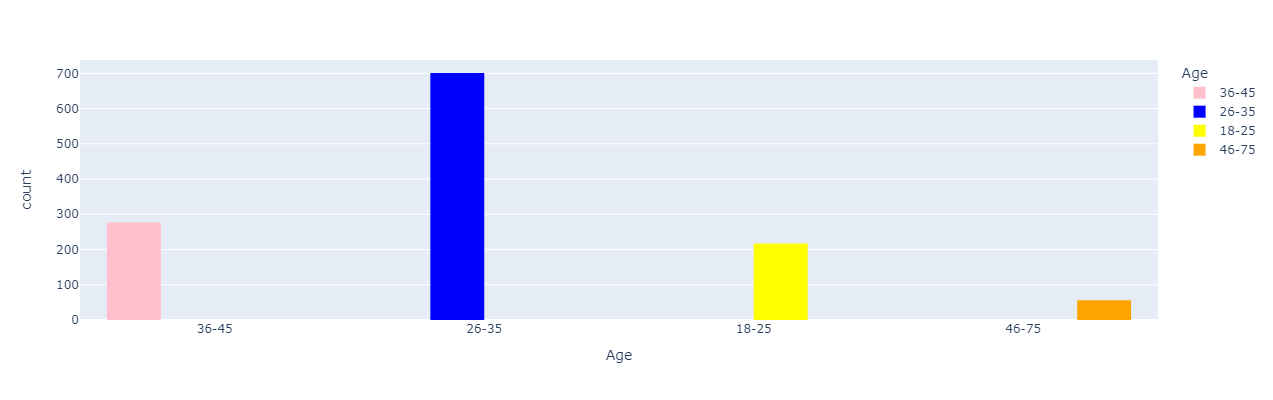

In [87]:
px.histogram(df, x='Age', barmode='group',color="Age",  color_discrete_sequence=[ "pink", "blue", "yellow", "orange"],  width=700, height=400)

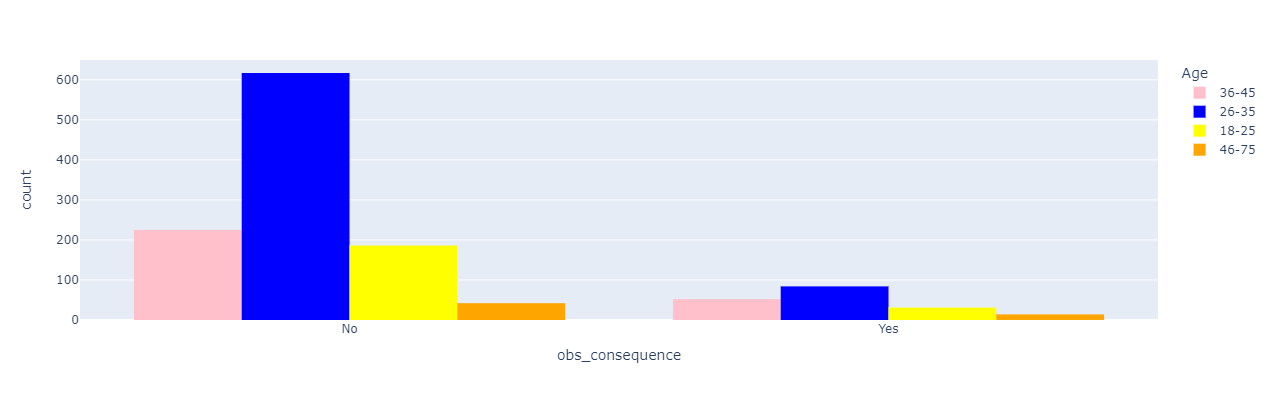

In [86]:
px.histogram(df, x='obs_consequence', barmode='group',color="Age",  color_discrete_sequence=[ "pink", "blue", "yellow", "orange"],  width=700, height=400)

## Gender

In [18]:
df.Gender.value_counts()

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [19]:
#Creating gender groups - This logic idea taken from:https://www.kaggle.com/kairosart/machine-learning-for-mental-health

gender_male = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr",
            "cis man", "Cis Male", "cis male"]

gender_female = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

gender_trans = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid",
             "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman",
             "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in gender_male:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in gender_female:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in gender_trans:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of unknown values
df = df[~df['Gender'].isin(['A little about you', 'p'])]

print(df['Gender'].unique())

['female' 'male' 'trans']


In [20]:
df.Gender.value_counts(dropna=True)

male      986
female    247
trans      18
Name: Gender, dtype: int64

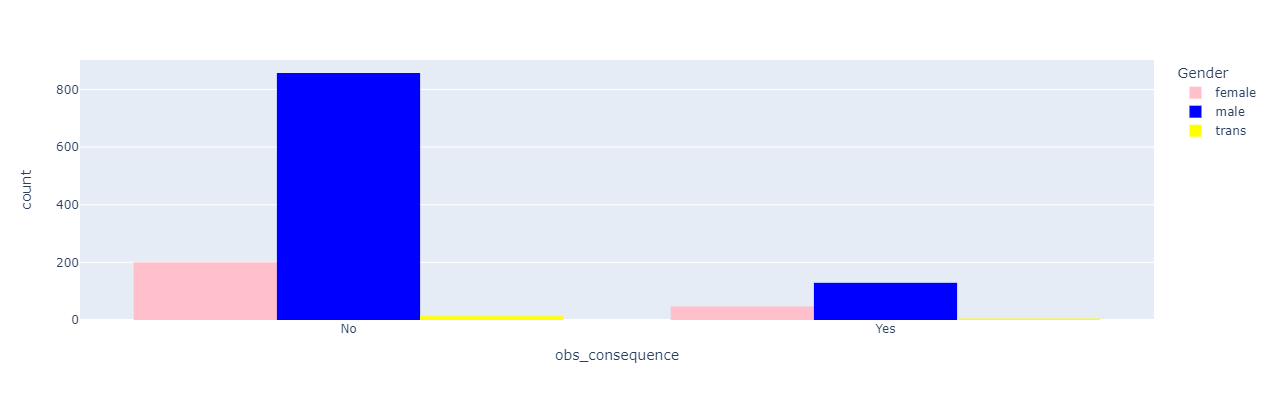

In [85]:
px.histogram(df, x='obs_consequence', barmode='group',color="Gender",  color_discrete_sequence=[ "pink", "blue", "yellow"],  width=700, height=400)

## Country

In [22]:
df.Country.value_counts()

United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

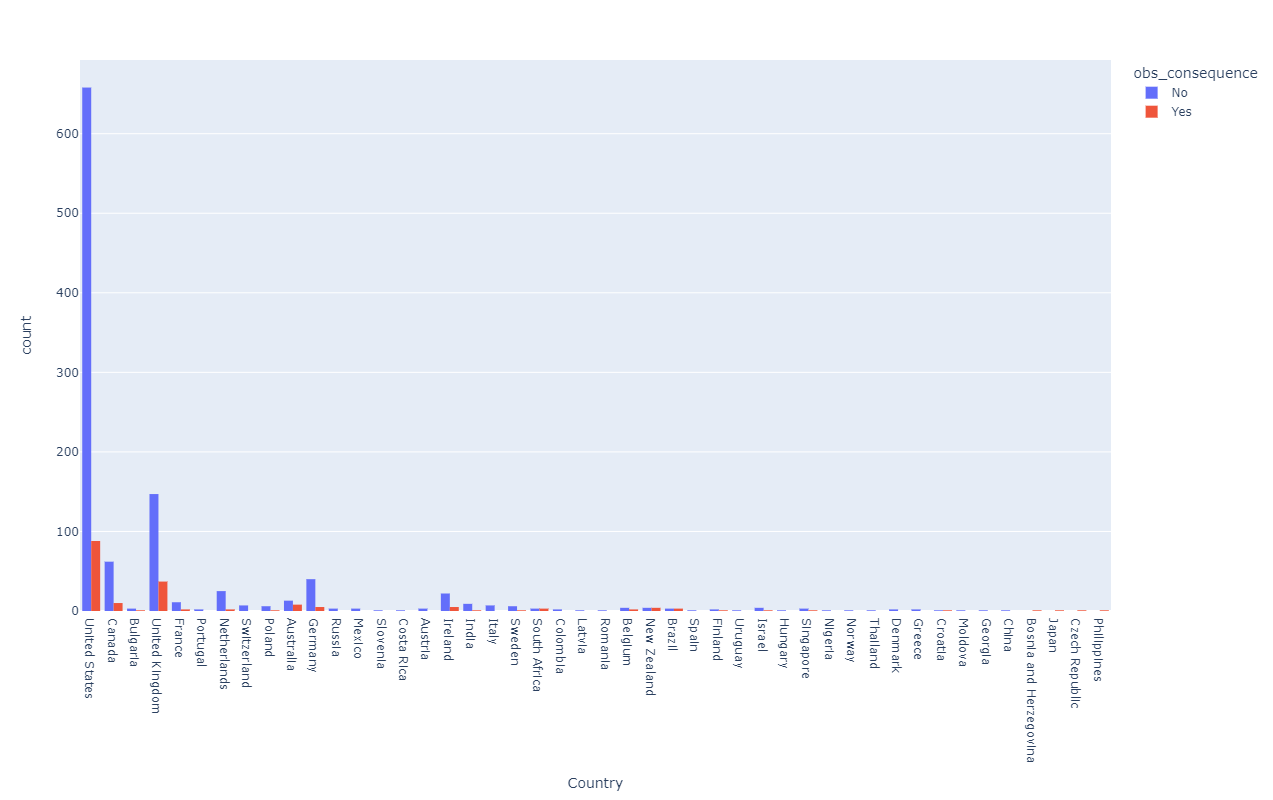

In [23]:
px.histogram(df, x='Country', color="obs_consequence", barmode='group', width=1170, height=800)

## Self-employed

Are you self-employed?

In [24]:
df.self_employed.value_counts(dropna=False)

No     1091
Yes     142
NaN      18
Name: self_employed, dtype: int64

In [25]:
df.self_employed.fillna("No", inplace=True)

In [26]:
df.self_employed.value_counts(dropna=False)

No     1109
Yes     142
Name: self_employed, dtype: int64

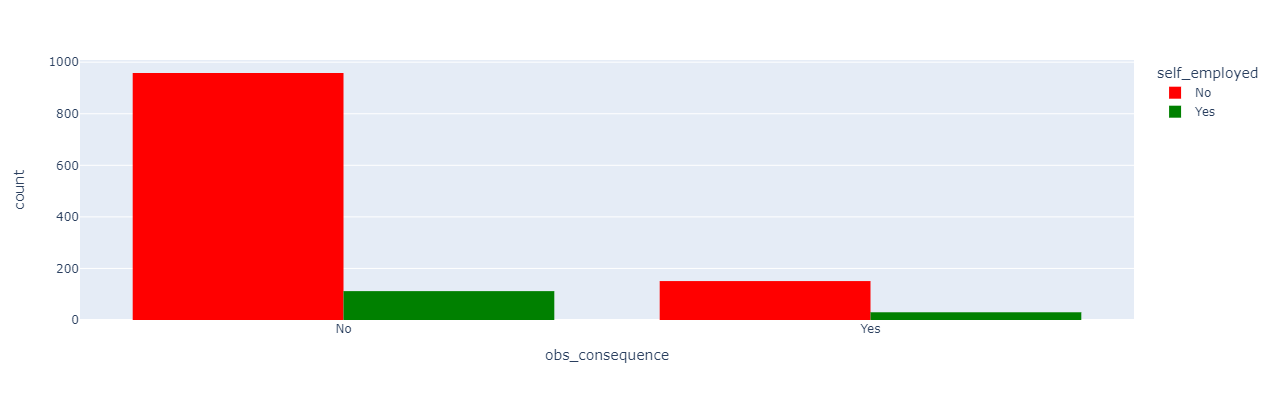

In [83]:
px.histogram(df, x='obs_consequence', barmode='group', color= "self_employed",  width=450, height=400, color_discrete_sequence=["red", "green"])

## Family History

Do you have a family history of mental illness?

In [28]:
df.family_history.value_counts()

No     762
Yes    489
Name: family_history, dtype: int64

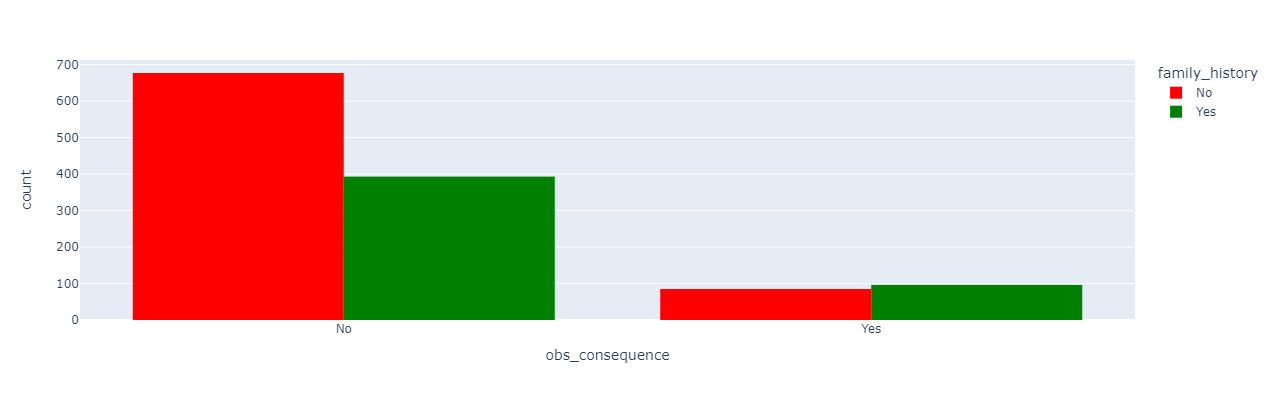

In [84]:
px.histogram(df, x='obs_consequence', barmode='group', color= "family_history",  width=450, height=400, color_discrete_sequence=["red", "green"])

## Treatment

Have you sought treatment for a mental health condition?

In [30]:
df.treatment.value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

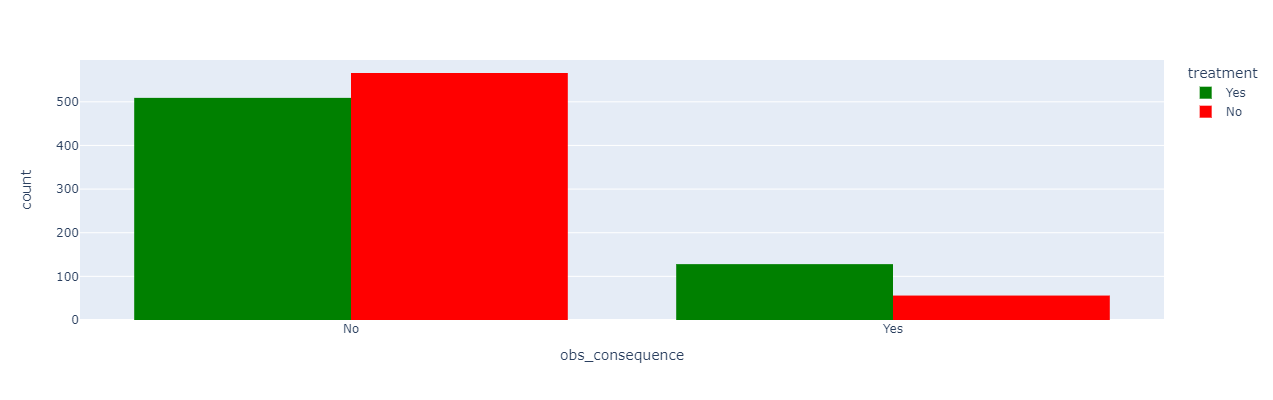

In [3]:
px.histogram(df, x='obs_consequence', barmode='group', color= "treatment",  width=450, height=400, color_discrete_sequence=["green", "red",])

## Work_interfere

If you have a mental health condition, do you feel that it interferes with your work?

In [32]:
df.work_interfere.value_counts(dropna=False)

Sometimes    464
NaN          262
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

In [33]:
df.groupby('treatment')["work_interfere"].value_counts(dropna=False)

treatment  work_interfere
No         NaN               258
           Never             182
           Sometimes         107
           Rarely             51
           Often              21
Yes        Sometimes         357
           Rarely            122
           Often             119
           Never              30
           NaN                 4
Name: work_interfere, dtype: int64

In [34]:
df.loc[ (df['treatment'] == 'No') & (df['work_interfere'].isnull()),'work_interfere'] = 'Does not have a mental illness'

df.loc[ (df['treatment'] == 'Yes') & (df['work_interfere'].isnull()),'work_interfere'] = df.work_interfere.value_counts().index[0]

In [35]:
df["work_interfere"].value_counts(dropna=False)

Sometimes                         468
Does not have a mental illness    258
Never                             212
Rarely                            173
Often                             140
Name: work_interfere, dtype: int64

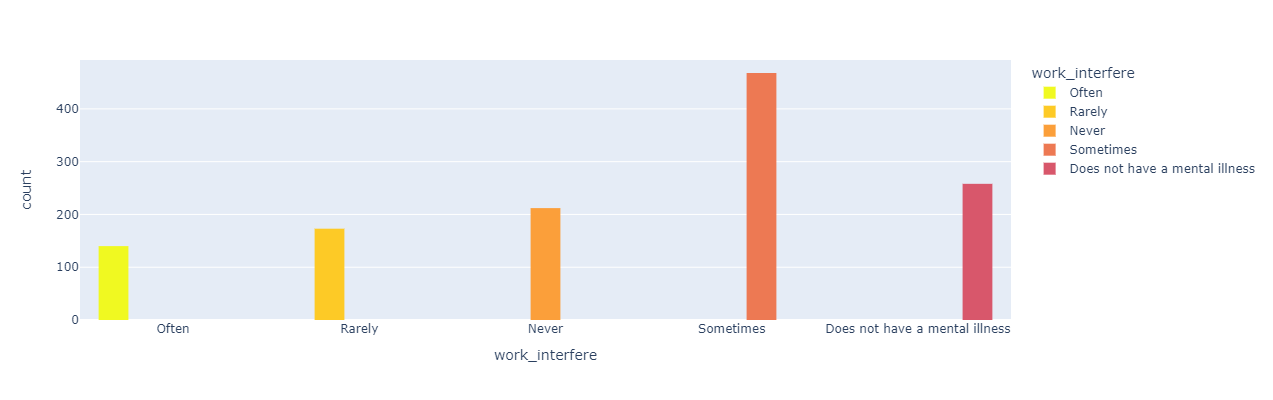

In [36]:
px.histogram(df, x='work_interfere', barmode='group', color= "work_interfere",  width=750, height=400, color_discrete_sequence= px.colors.sequential.Plasma_r)

## no_employees

How many employees does your company or organization have?

In [37]:
df.no_employees.value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64

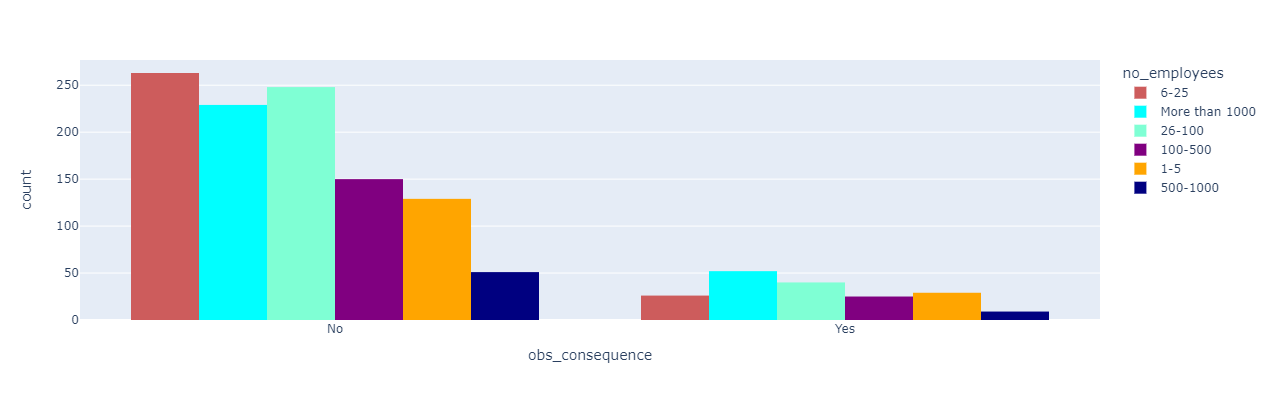

In [38]:
px.histogram(df, x='obs_consequence', barmode='group', color= "no_employees" , width=850, height=400, color_discrete_sequence=["indianred", "cyan", "aquamarine", "purple", "orange", "navy"])

## remote_work

Do you work remotely (outside of an office) at least 50% of the time?

In [39]:
df.remote_work.value_counts()

No     880
Yes    371
Name: remote_work, dtype: int64

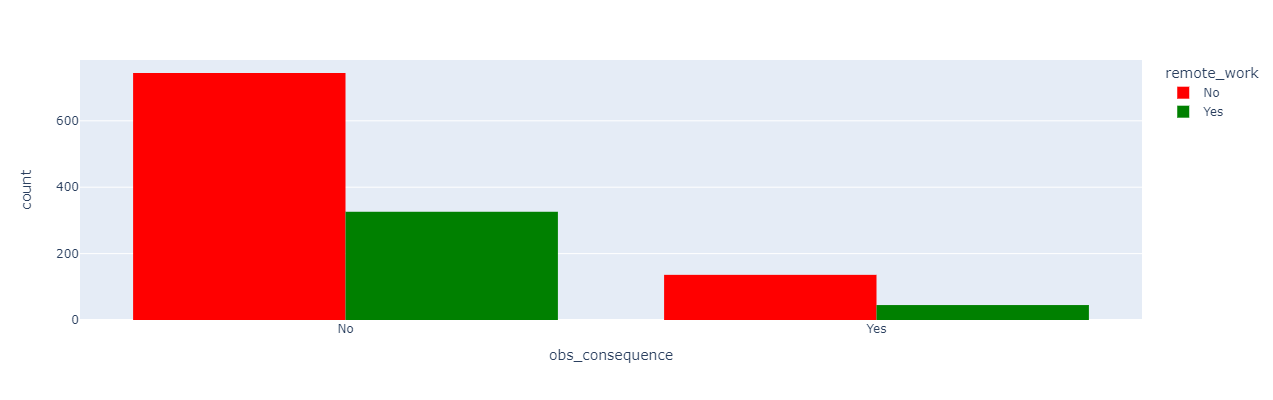

In [82]:
px.histogram(df, x='obs_consequence', barmode='group', color= "remote_work",  width=450, height=400, color_discrete_sequence=["red", "green"])

## tech_company

Is your employer primarily a tech company/organization?

In [42]:
df.tech_company.value_counts()

Yes    1025
No      226
Name: tech_company, dtype: int64

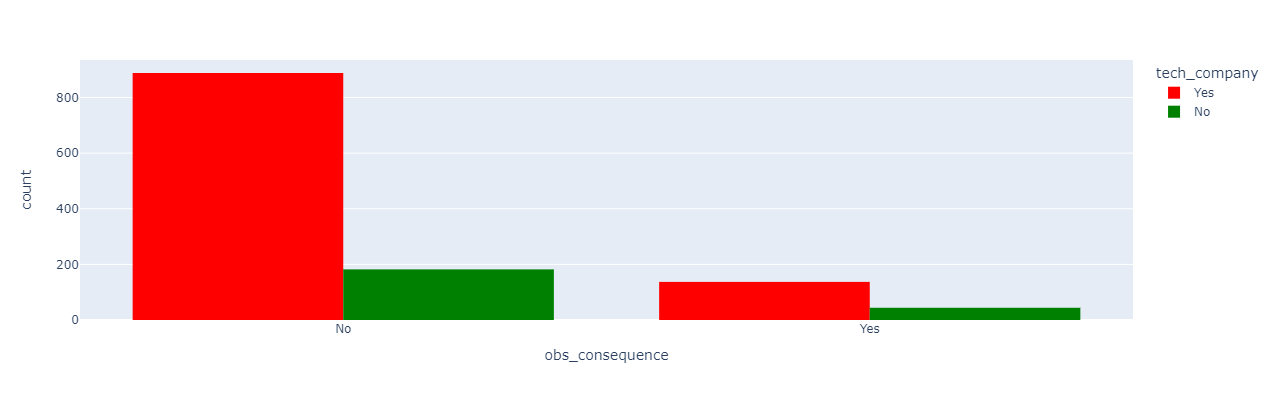

In [81]:
px.histogram(df, x='obs_consequence', barmode='group', color= "tech_company",  width=450, height=400, color_discrete_sequence=["red","green"])

## benefits

Does your employer provide mental health benefits?

In [46]:
df.benefits.value_counts()

Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64

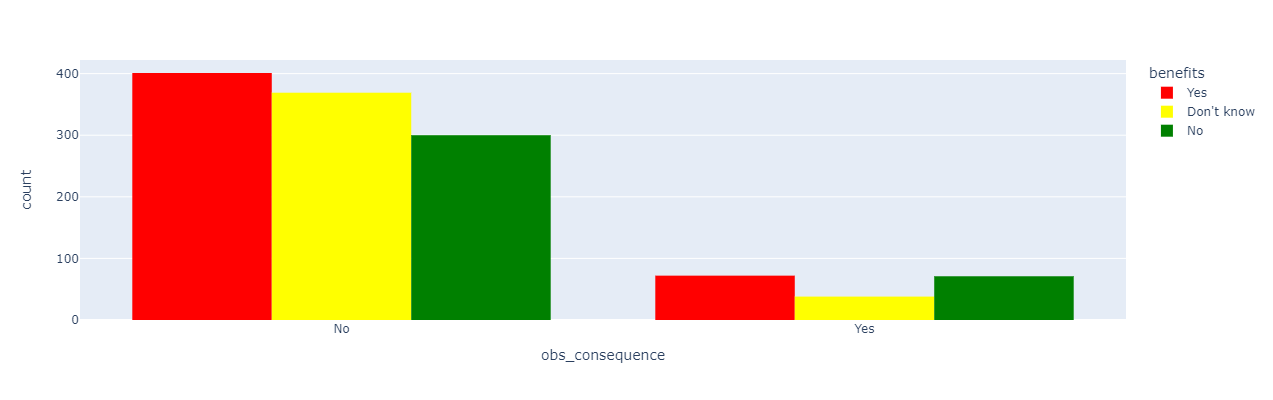

In [79]:
px.histogram(df, x='obs_consequence', barmode='group', color= "benefits",  width=750, height=400, color_discrete_sequence=["red","yellow" ,"green" ])

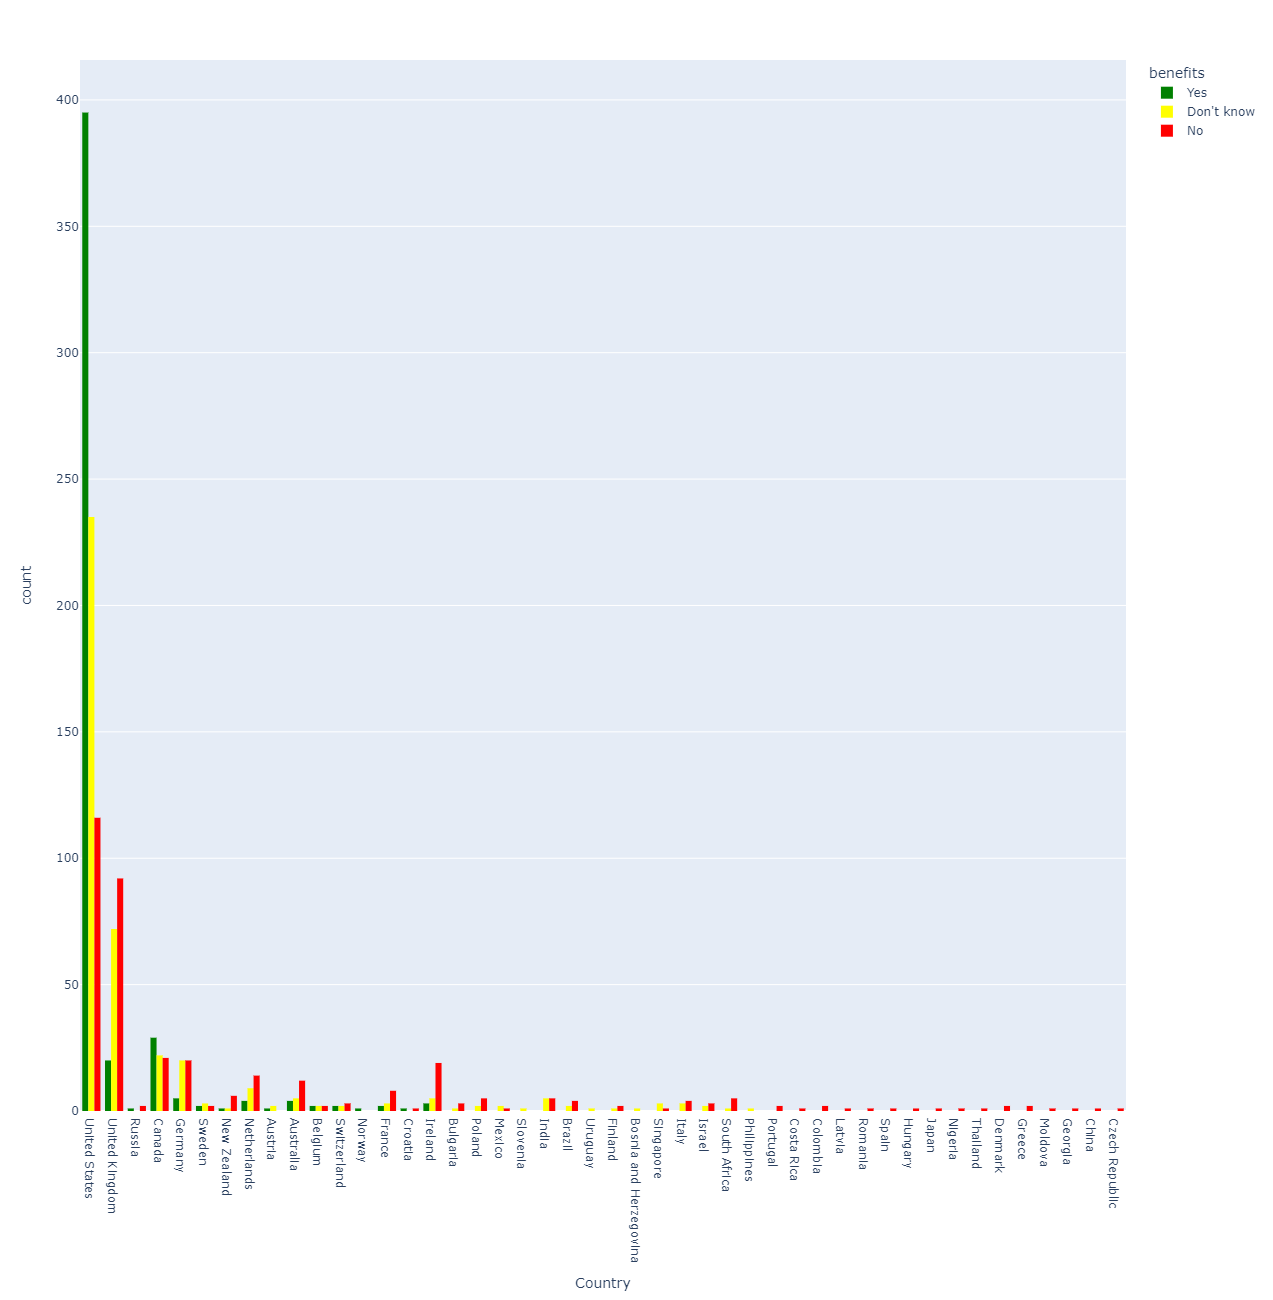

In [49]:
px.histogram(df, x='Country', color="benefits", barmode='group', width=1250, height=1300, color_discrete_sequence=["green", "yellow","red" ])

## care_options

Do you know the options for mental health care your employer provides?

In [210]:
df.care_options.value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

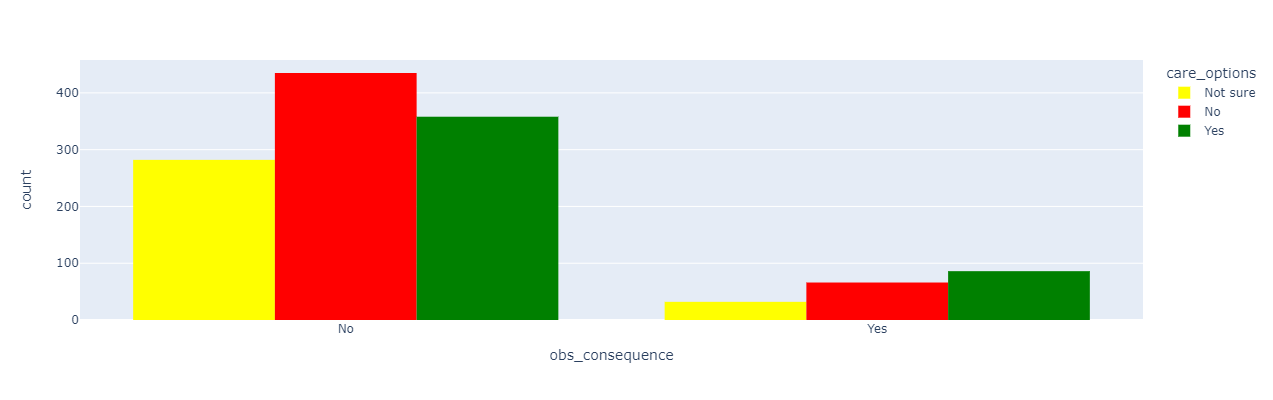

In [211]:
px.histogram(df, x='obs_consequence', barmode='group', color= "care_options",  width=750, height=400, color_discrete_sequence=[ "yellow","red", "green"])

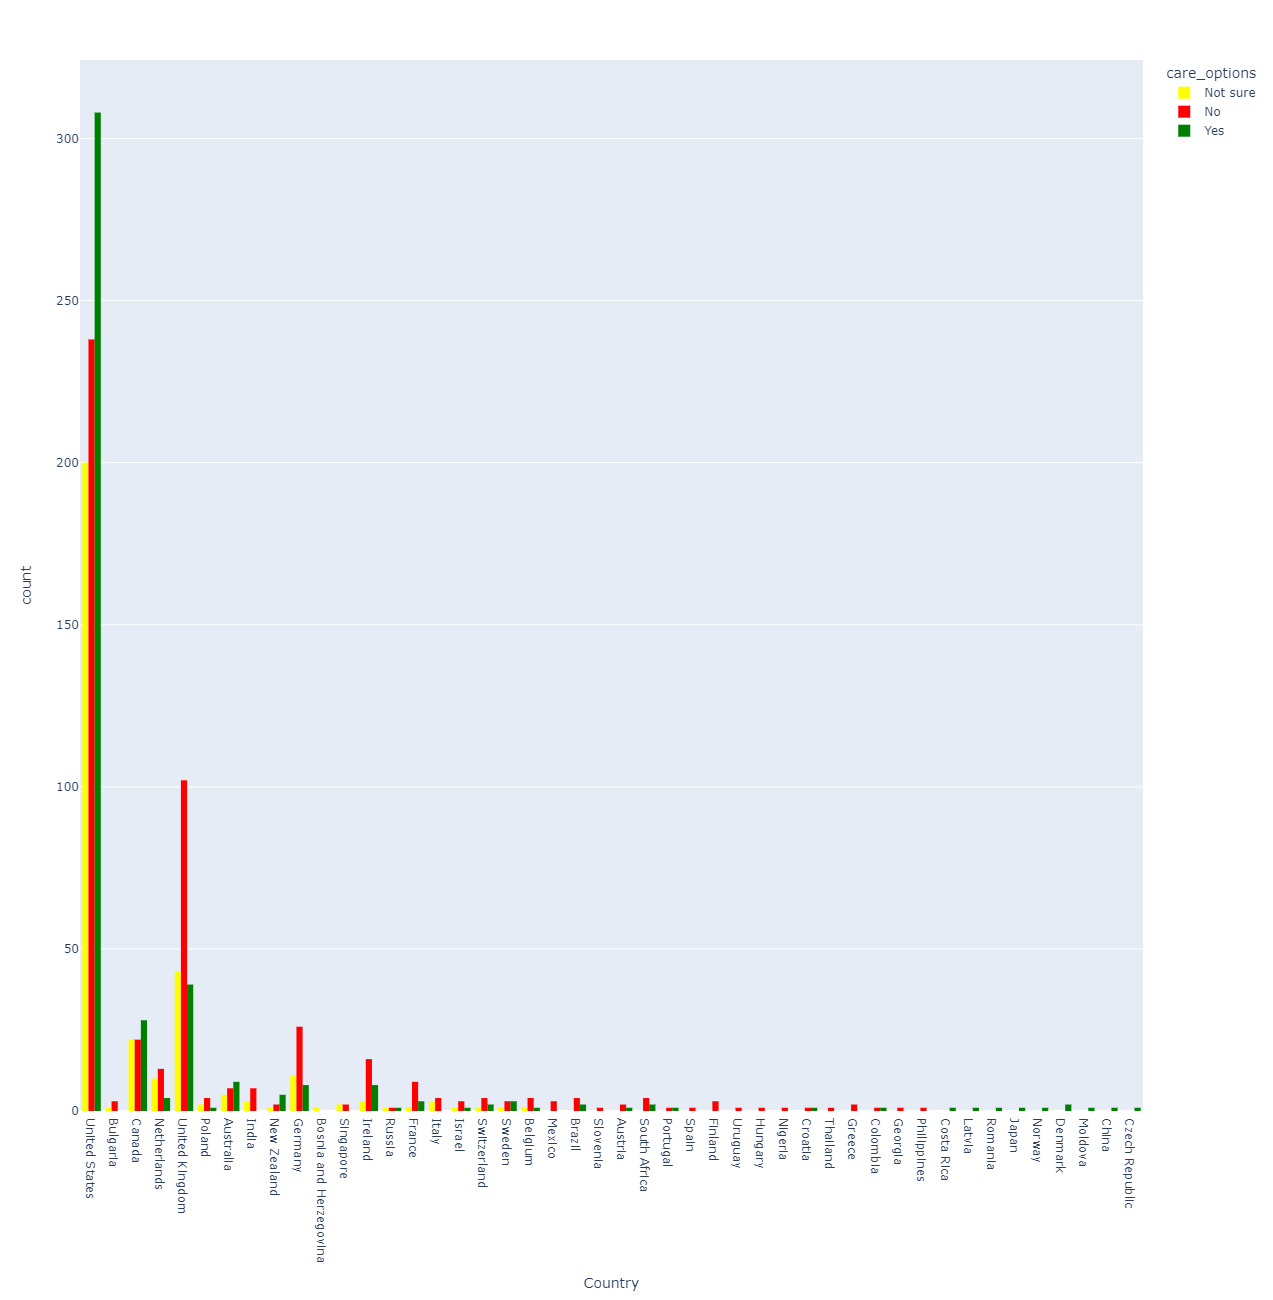

In [52]:
px.histogram(df, x='Country', color="care_options", barmode='group', width=1280, height=1300, color_discrete_sequence=[ "yellow","red","green", ])

In [53]:
df.drop("care_options", axis=1,inplace=True)

## wellness_program

Has your employer ever discussed mental health as part of an employee wellness program?

In [212]:
df.wellness_program.value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

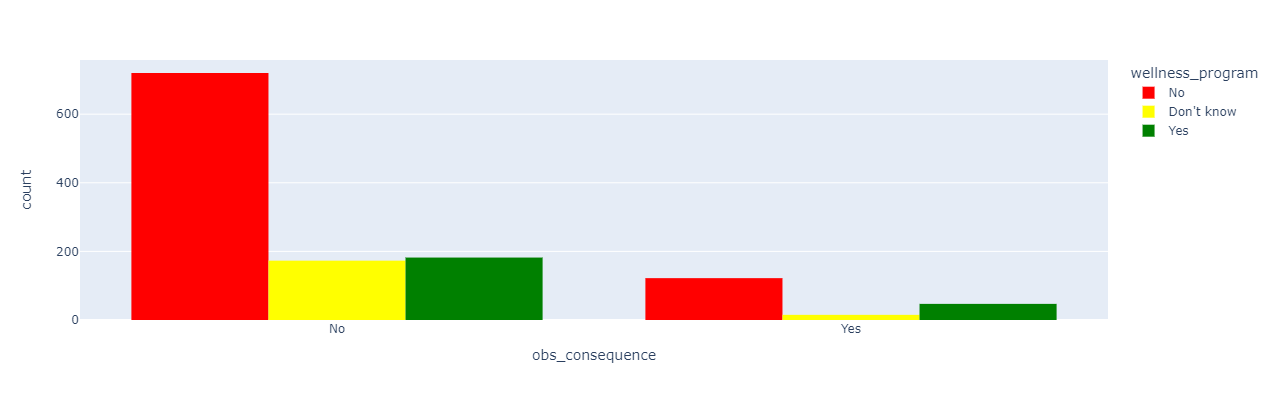

In [213]:
px.histogram(df, x='obs_consequence', barmode='group', color= "wellness_program",  width=750, height=400, color_discrete_sequence=["red", "yellow","green"])

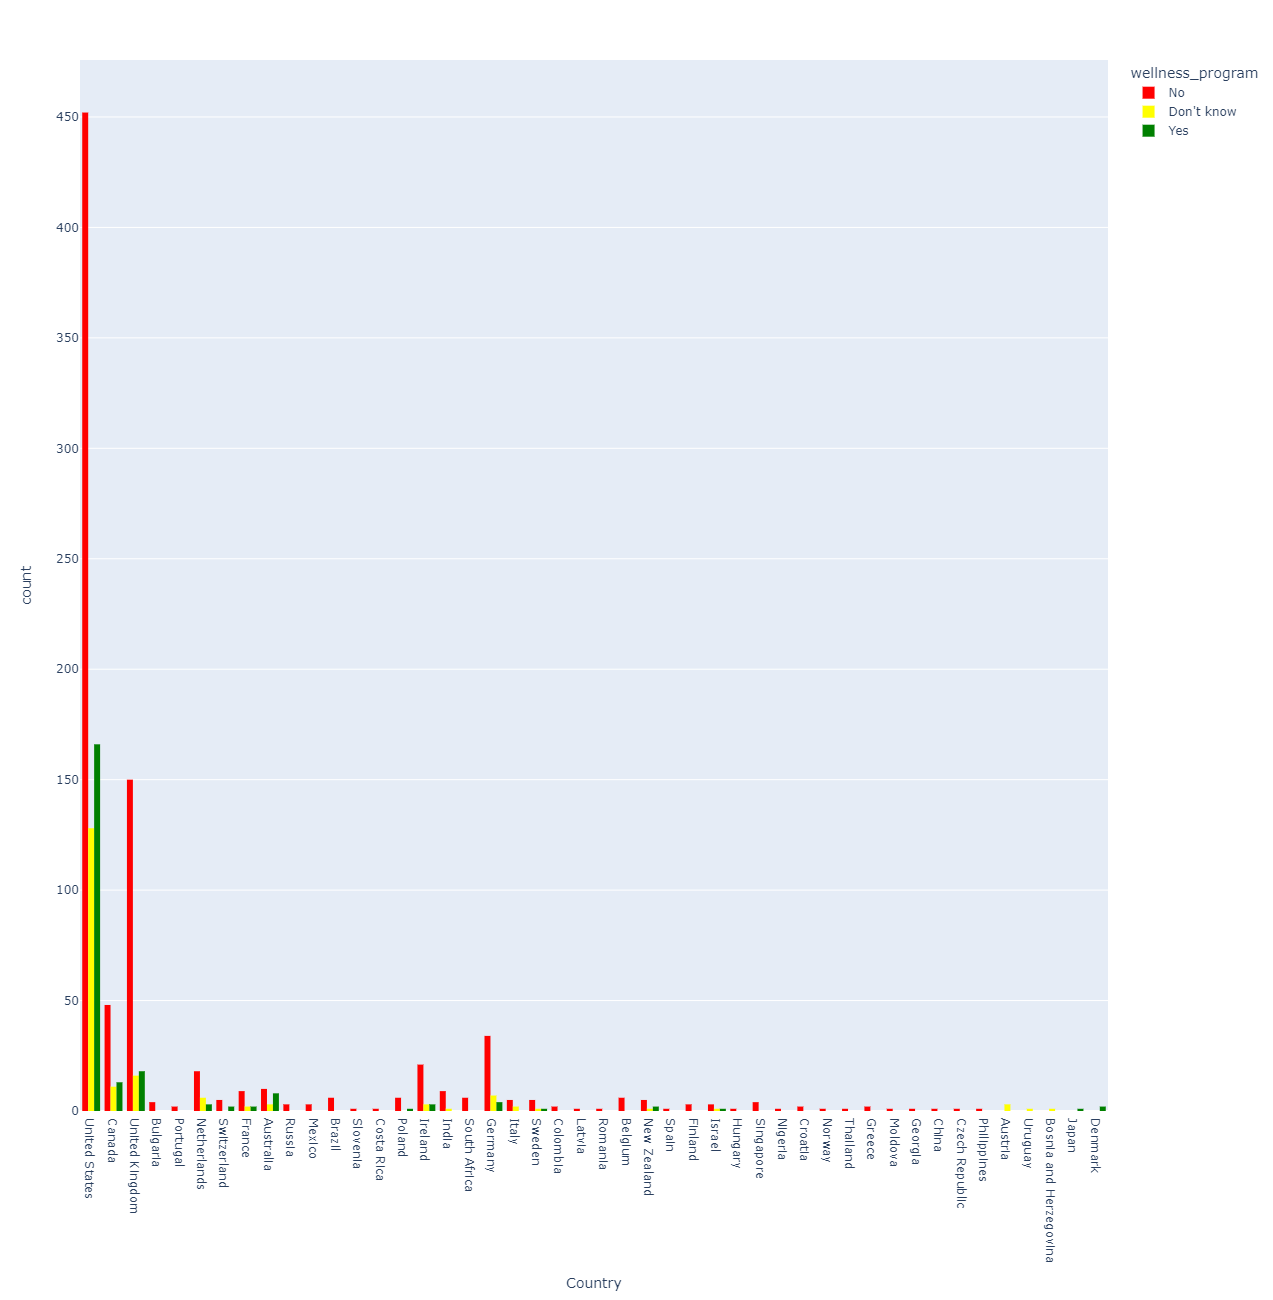

In [59]:
px.histogram(df, x='Country', barmode='group', color= "wellness_program",  width=1280, height=1300, color_discrete_sequence=["red", "yellow","green"])

In [67]:
df.drop("wellness_program", axis=1, inplace=True)

## seek_help

Does your employer provide resources to learn more about mental health issues and how to seek help?

In [60]:
df.seek_help.value_counts()

No            641
Don't know    363
Yes           247
Name: seek_help, dtype: int64

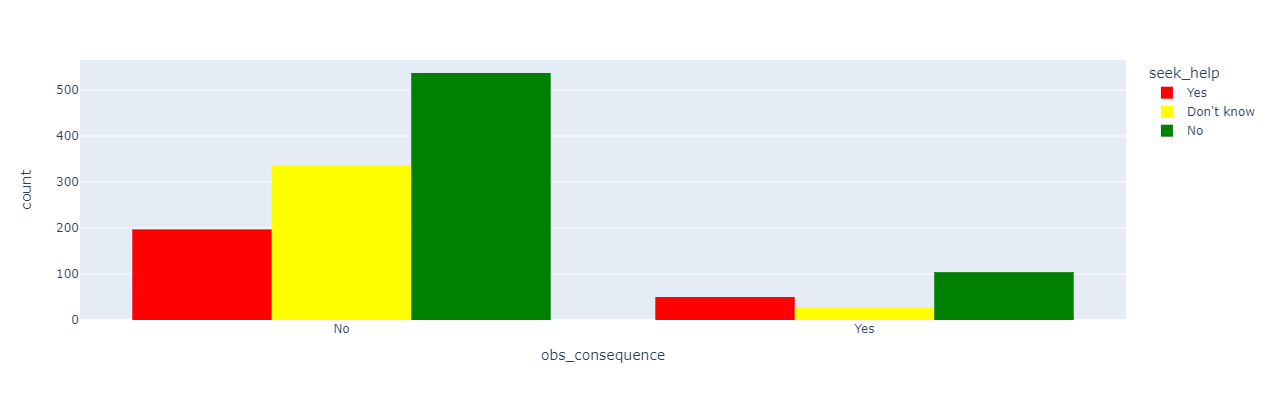

In [74]:
px.histogram(df, x='obs_consequence', barmode='group', color= "seek_help",  width=750, height=400, color_discrete_sequence=["red","yellow", "green"])

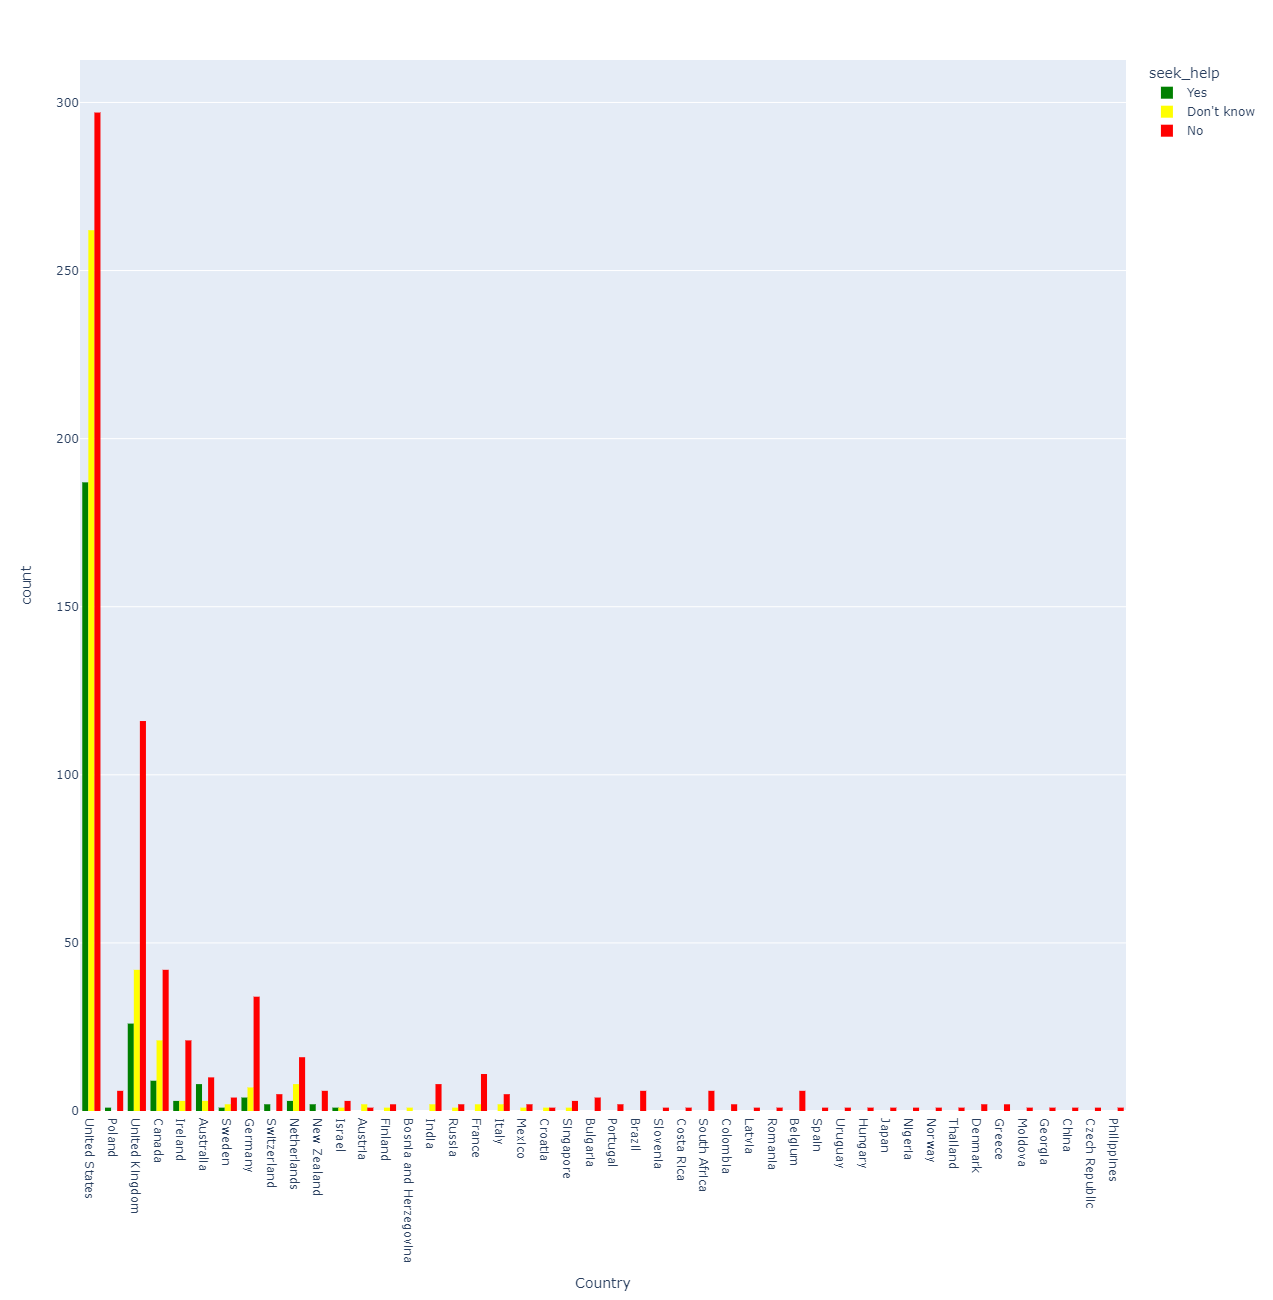

In [63]:
px.histogram(df, x='Country', barmode='group', color= "seek_help",  width=1280, height=1300, color_discrete_sequence=["green", "yellow", "red"])

## anonymity

Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

In [68]:
df.anonymity.value_counts()

Don't know    815
Yes           372
No             64
Name: anonymity, dtype: int64

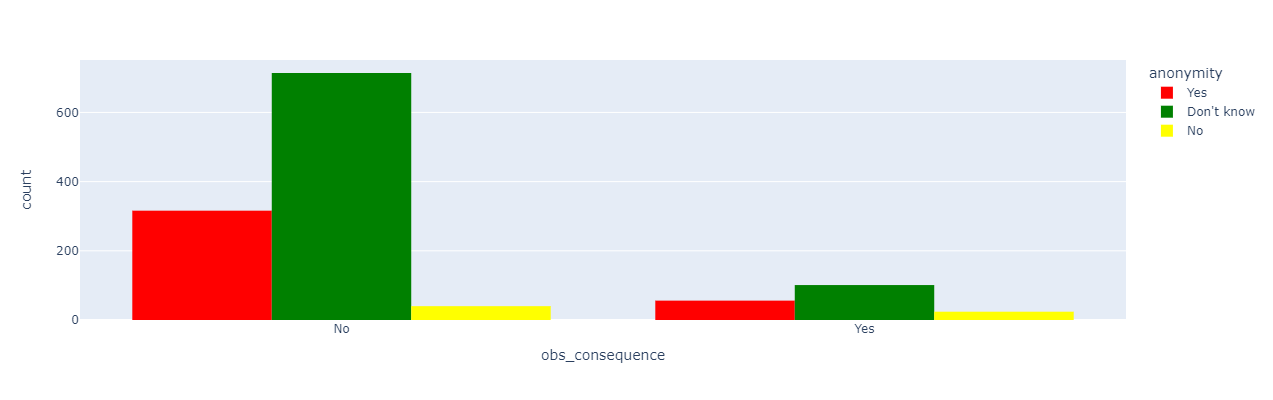

In [72]:
px.histogram(df, x='obs_consequence', barmode='group', color= "anonymity",  width=750, height=400, color_discrete_sequence=["red","green", "yellow", ])

## leave

How easy is it for you to take medical leave for a mental health condition?

In [88]:
df.leave.value_counts()

Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64

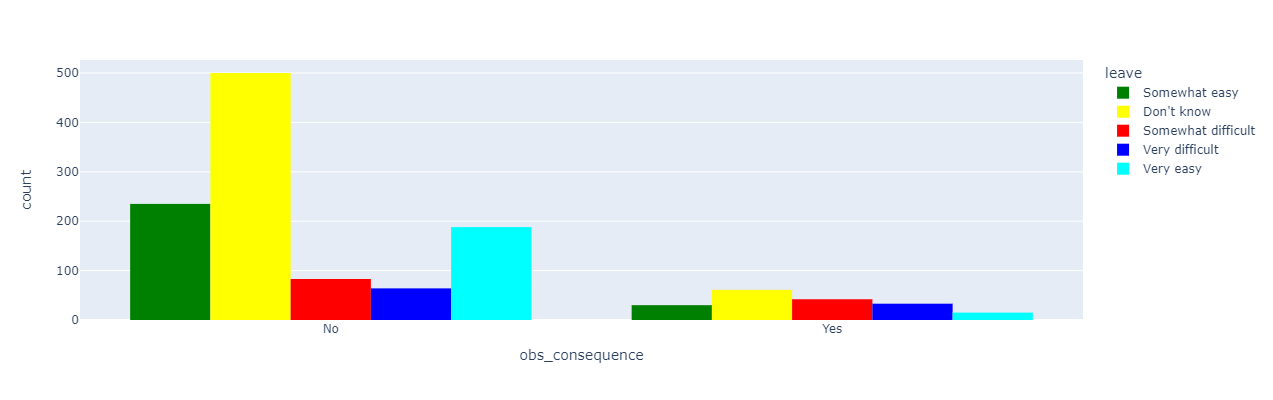

In [90]:
px.histogram(df, x='obs_consequence', barmode='group', color= "leave",  width=950, height=400, color_discrete_sequence=["green", "yellow", "red", "blue", "cyan"])

## mental_health_consequence

Do you think that discussing a mental health issue with your employer would have negative consequences?

In [91]:
df.mental_health_consequence.value_counts()

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

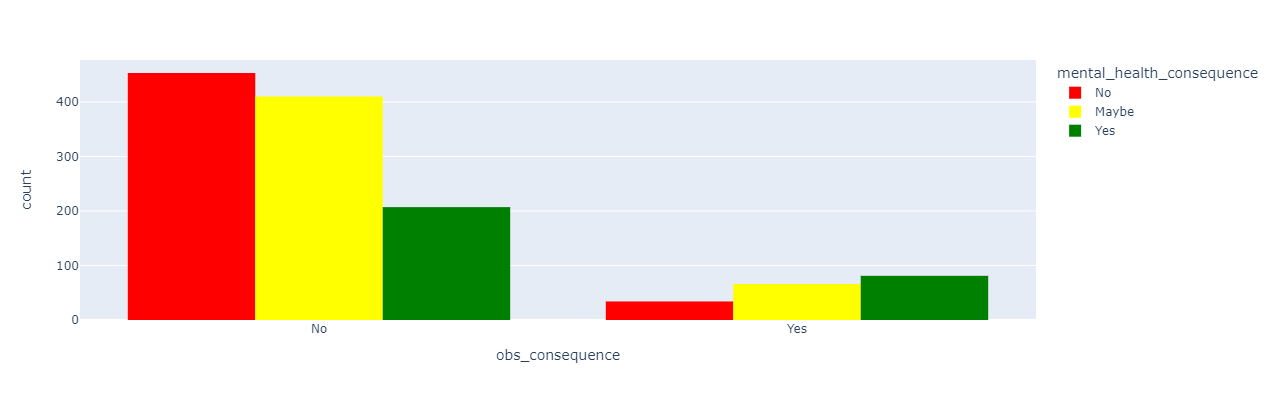

In [93]:
px.histogram(df, x='obs_consequence', barmode='group', color= "mental_health_consequence",  width=750, height=400, color_discrete_sequence=["red",  "yellow", "green"])

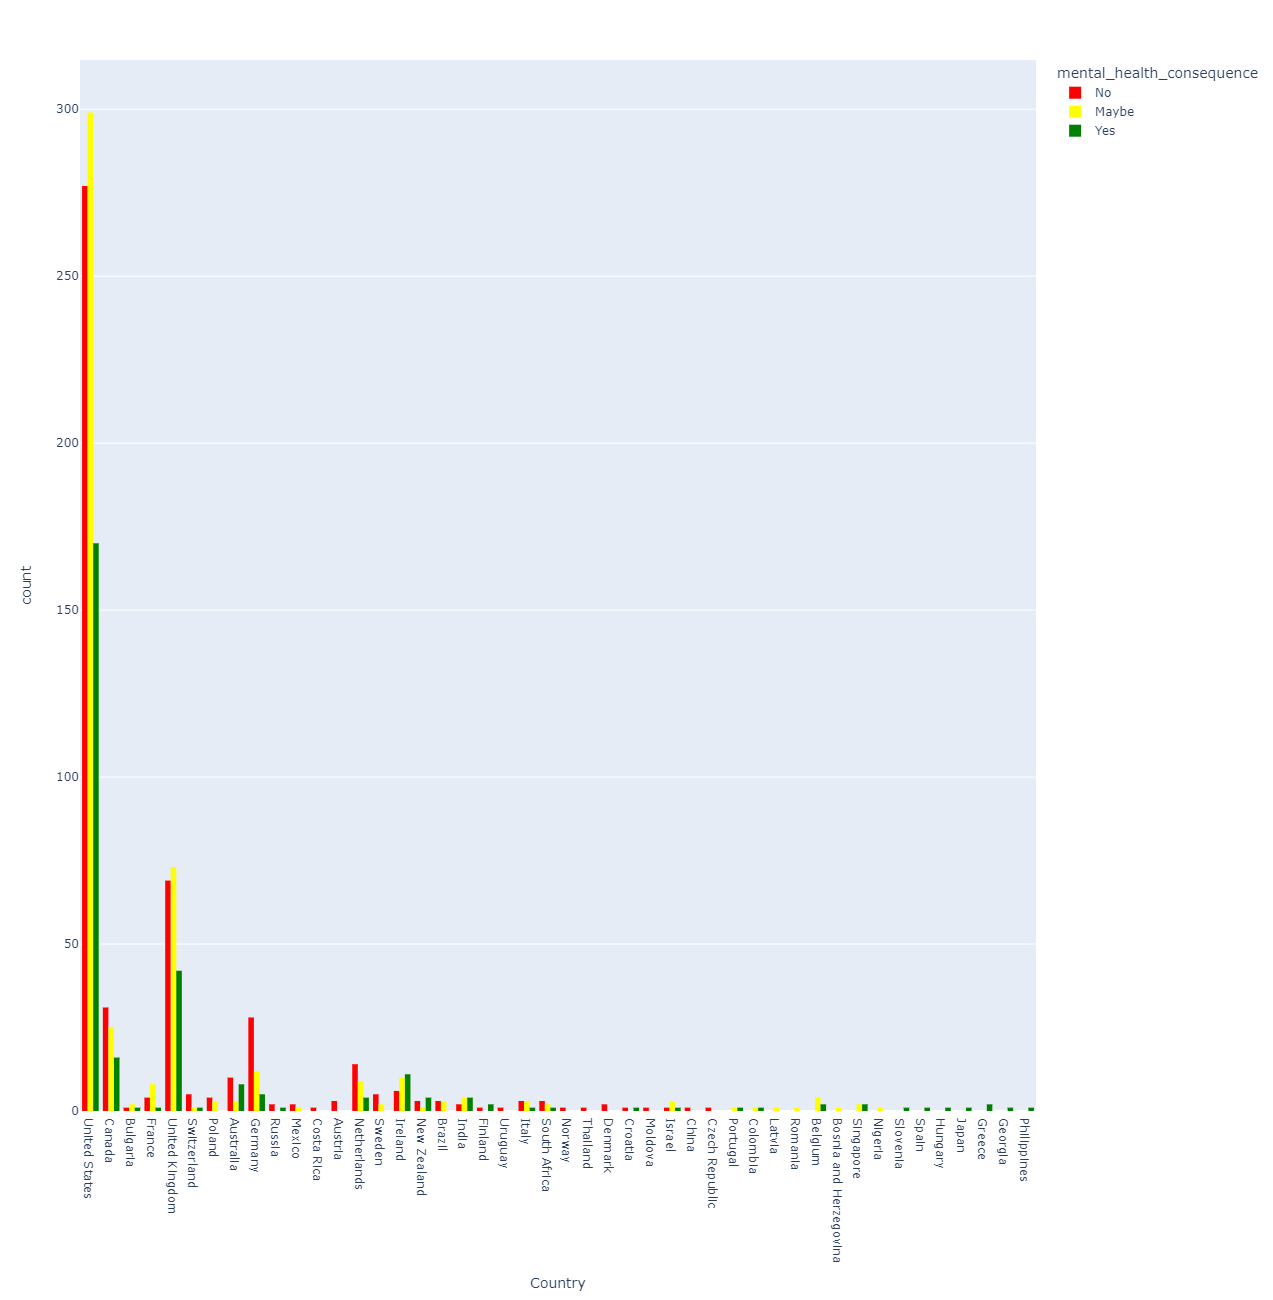

In [95]:
px.histogram(df, x='Country', barmode='group', color= "mental_health_consequence",  width=1280, height=1300, color_discrete_sequence=["red",  "yellow", "green"])

## phys_health_consequence

Do you think that discussing a physical health issue with your employer would have negative consequences

In [96]:
df.phys_health_consequence.value_counts()

No       920
Maybe    273
Yes       58
Name: phys_health_consequence, dtype: int64

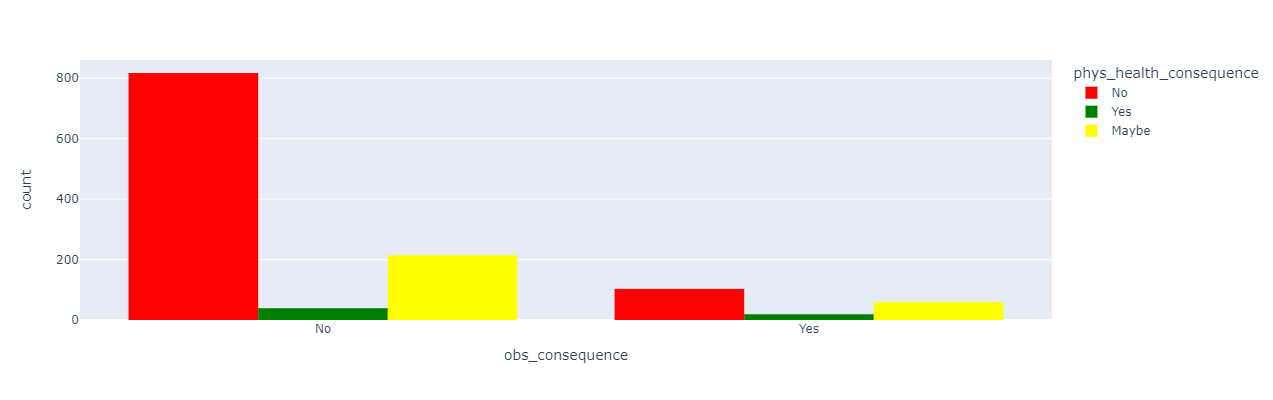

In [99]:
px.histogram(df, x='obs_consequence', barmode='group', color= "phys_health_consequence",  width=750, height=400, color_discrete_sequence=["red", "green", "yellow"])

## coworkers

Would you be willing to discuss a mental health issue with your coworkers?

In [102]:
df.coworkers.value_counts()

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64

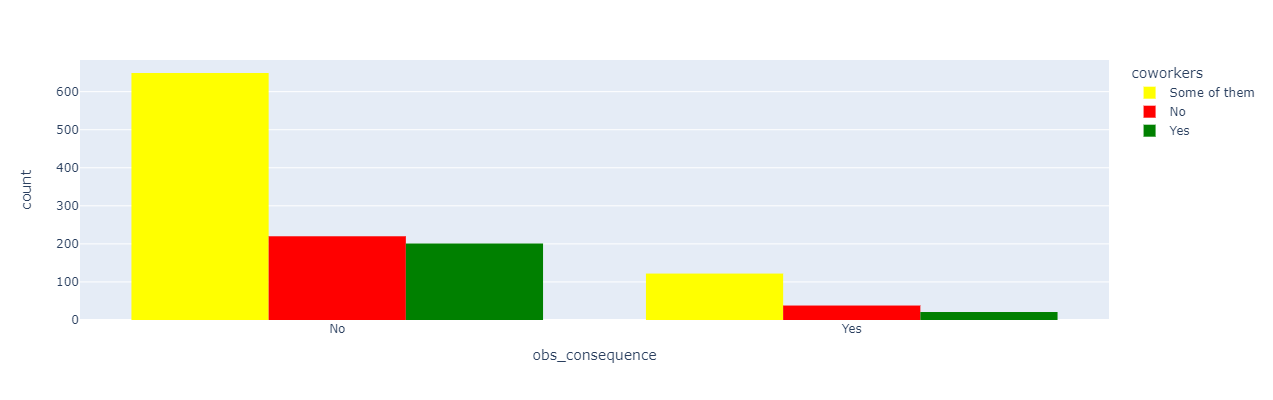

In [104]:
px.histogram(df, x='obs_consequence', barmode='group', color= "coworkers",  width=750, height=400, color_discrete_sequence=["yellow", "red", "green"])

## supervisor

Would you be willing to discuss a mental health issue with your direct supervisor(s)?

In [105]:
df.supervisor.value_counts()

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64

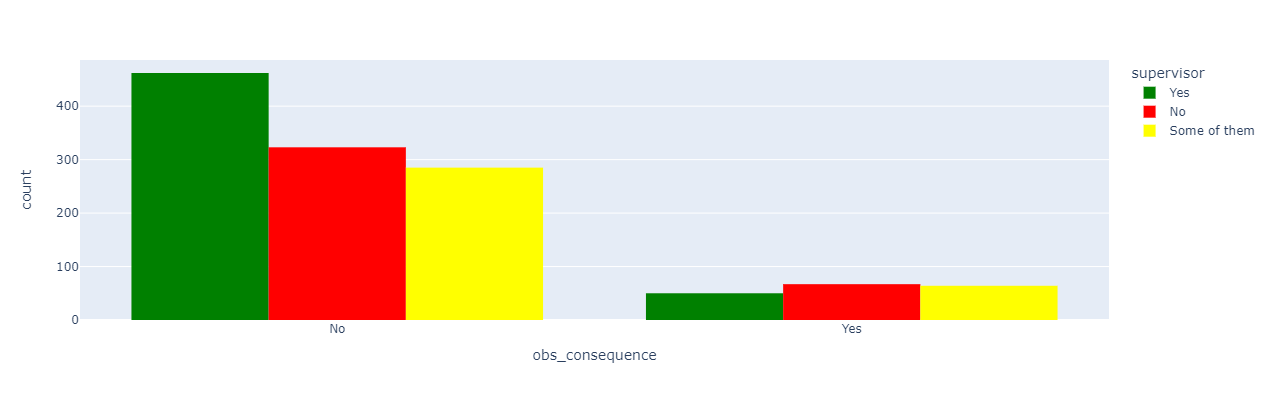

In [109]:
px.histogram(df, x='obs_consequence', barmode='group', color= "supervisor",  width=750, height=400, color_discrete_sequence=["green", "red", "yellow"])

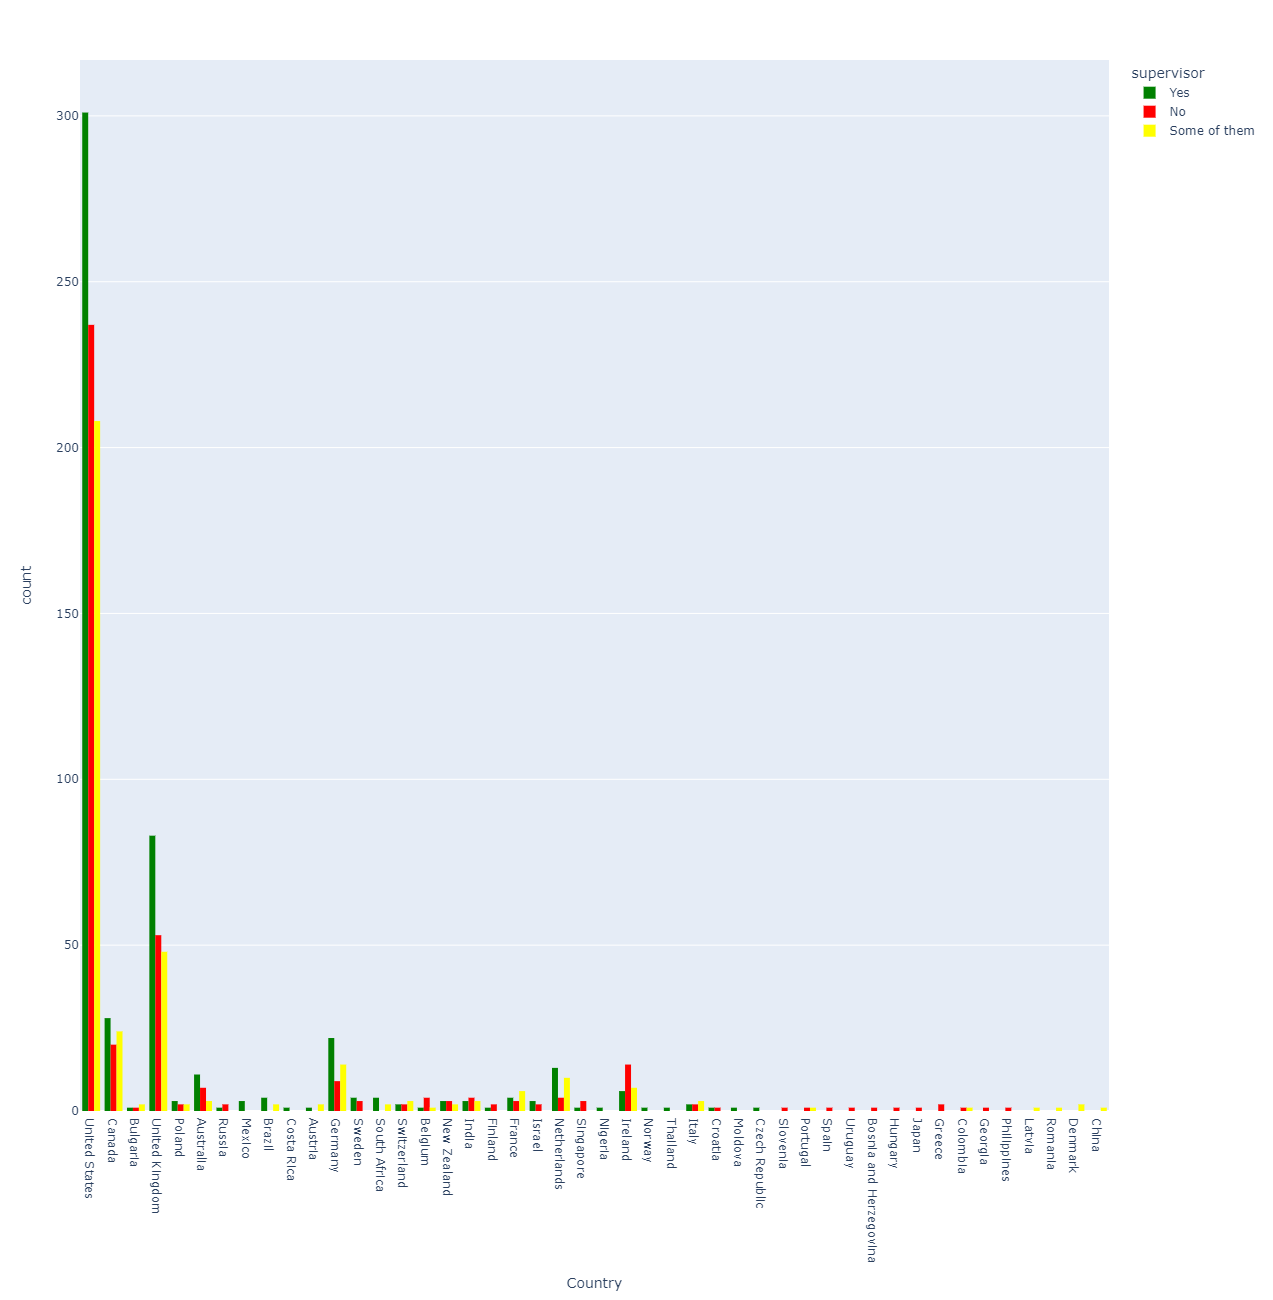

In [108]:
px.histogram(df, x='Country', barmode='group', color= "supervisor",  width=1280, height=1300, color_discrete_sequence=["green", "red", "yellow"])

## mental_health_interview

Would you bring up a mental health issue with a potential employer in an interview?

In [110]:
df.mental_health_interview.value_counts()

No       1003
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64

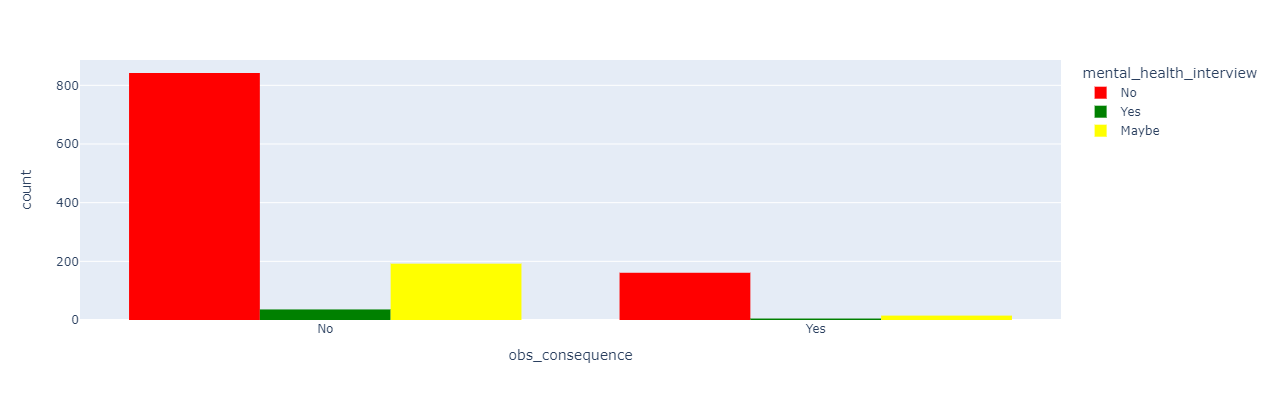

In [113]:
px.histogram(df, x='obs_consequence', barmode='group', color= "mental_health_interview",  width=750, height=400, color_discrete_sequence=["red","green", "yellow"])

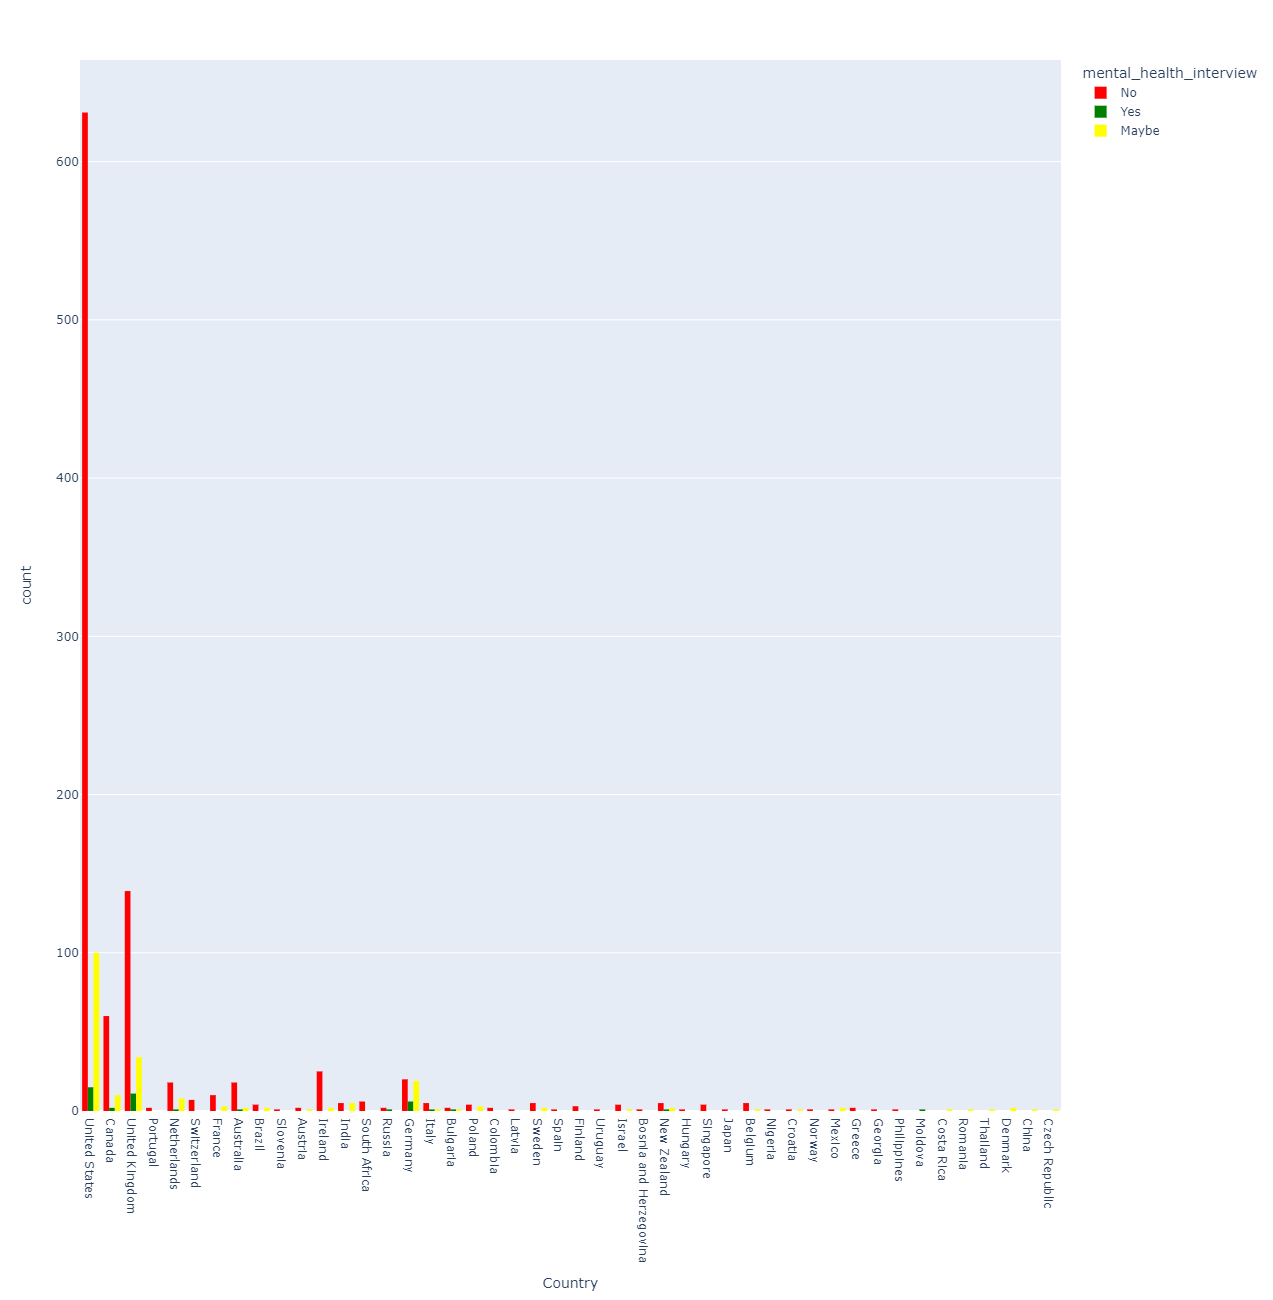

In [114]:
px.histogram(df, x='Country', barmode='group', color= "mental_health_interview",  width=1280, height=1300, color_discrete_sequence=["red","green", "yellow"])

## phys_health_interview

Would you bring up a physical health issue with a potential employer in an interview?

In [115]:
df.phys_health_interview.value_counts()

Maybe    555
No       496
Yes      200
Name: phys_health_interview, dtype: int64

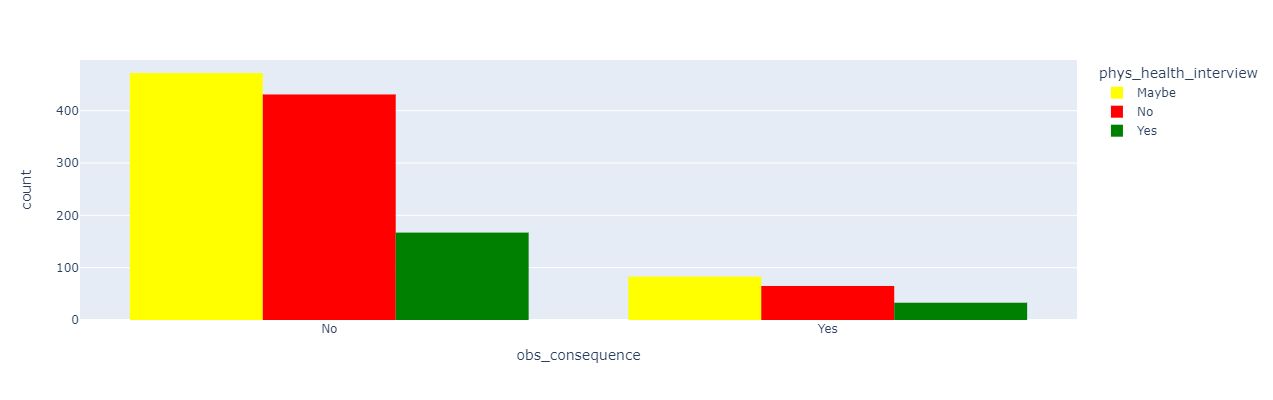

In [117]:
px.histogram(df, x='obs_consequence', barmode='group', color= "phys_health_interview",  width=750, height=400, color_discrete_sequence=[ "yellow","red","green"])

## mental_vs_physical

Do you feel that your employer takes mental health as seriously as physical health?

In [118]:
df.mental_vs_physical.value_counts()

Don't know    574
Yes           339
No            338
Name: mental_vs_physical, dtype: int64

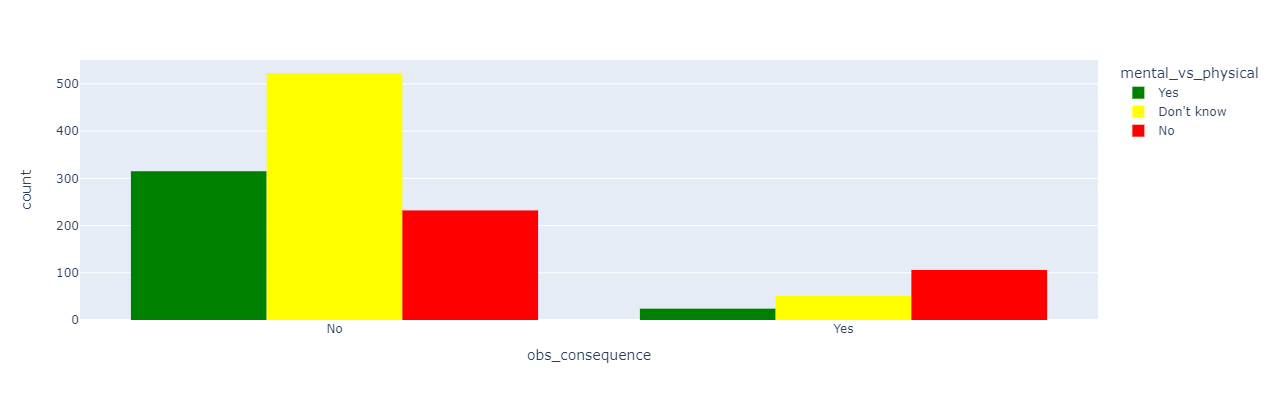

In [119]:
px.histogram(df, x='obs_consequence', barmode='group', color= "mental_vs_physical",  width=750, height=400, color_discrete_sequence=["green","yellow","red",])

## obs_consequence

Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

In [100]:
df.obs_consequence.value_counts()

No     1070
Yes     181
Name: obs_consequence, dtype: int64

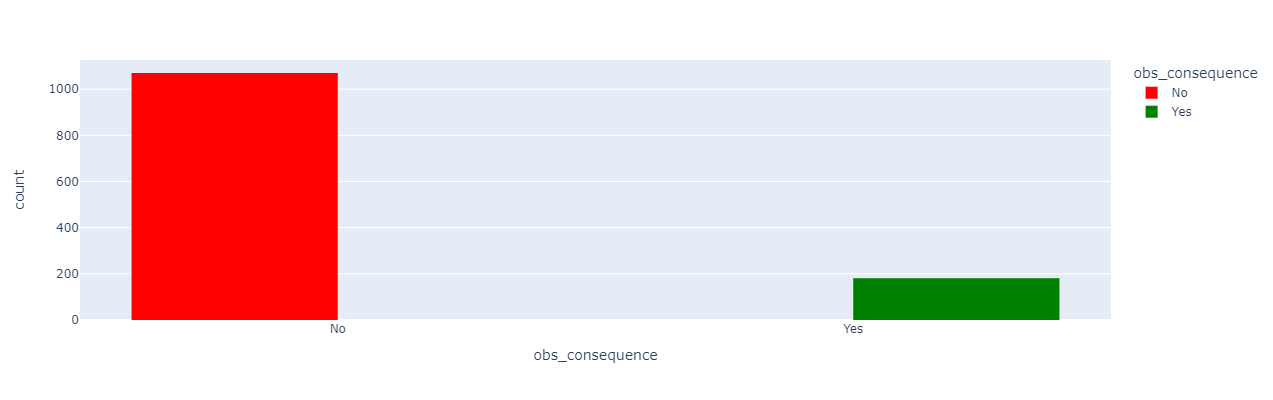

In [101]:
px.histogram(df, x='obs_consequence', barmode='group', color= "obs_consequence",  width=450, height=400, color_discrete_sequence=["red", "green"])

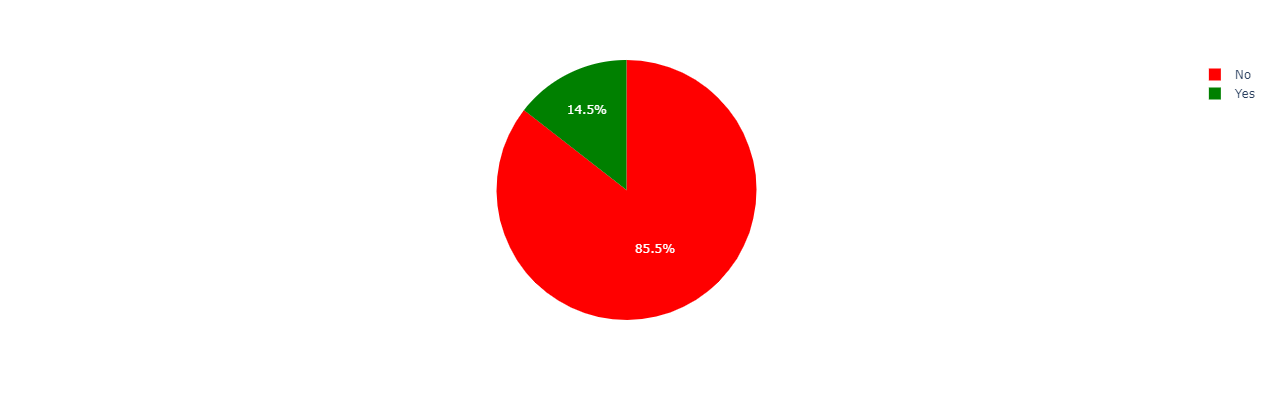

In [143]:
#data = px.df.tips()
fig = px.pie(df, values=df.obs_consequence.value_counts(), names=["No","Yes"],width=450, height=400, color_discrete_sequence=["red", "green"])
fig.show()

----------------------------------------

In [78]:
df.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Logistic Regression

In [145]:
X= pd.get_dummies(df.drop(columns="obs_consequence", axis=1))
y= df.obs_consequence

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=101)

In [147]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
log_model=LogisticRegression()

In [149]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [152]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[315   7]
 [ 45   9]]
              precision    recall  f1-score   support

          No       0.88      0.98      0.92       322
         Yes       0.56      0.17      0.26        54

    accuracy                           0.86       376
   macro avg       0.72      0.57      0.59       376
weighted avg       0.83      0.86      0.83       376


Train_Set
[[736  12]
 [ 92  35]]
              precision    recall  f1-score   support

          No       0.89      0.98      0.93       748
         Yes       0.74      0.28      0.40       127

    accuracy                           0.88       875
   macro avg       0.82      0.63      0.67       875
weighted avg       0.87      0.88      0.86       875



In [153]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [154]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [155]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [156]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[250  72]
 [ 16  38]]
              precision    recall  f1-score   support

          No       0.94      0.78      0.85       322
         Yes       0.35      0.70      0.46        54

    accuracy                           0.77       376
   macro avg       0.64      0.74      0.66       376
weighted avg       0.85      0.77      0.79       376


Train_Set
[[570 178]
 [ 35  92]]
              precision    recall  f1-score   support

          No       0.94      0.76      0.84       748
         Yes       0.34      0.72      0.46       127

    accuracy                           0.76       875
   macro avg       0.64      0.74      0.65       875
weighted avg       0.85      0.76      0.79       875



# Tree Based Models

In [157]:
from sklearn.preprocessing import OrdinalEncoder
data_encoding = df
cat = df.select_dtypes("object").columns
cat

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [158]:
enc = OrdinalEncoder()
data_encoding[cat] = enc.fit_transform(data_encoding[cat])
data_encoding.head()

Age  Gender  Country  self_employed  family_history  treatment  \
0  2.0     0.0     44.0            0.0             0.0        1.0   
1  2.0     1.0     44.0            0.0             0.0        0.0   
2  1.0     1.0      6.0            0.0             0.0        0.0   
3  1.0     1.0     43.0            0.0             1.0        1.0   
4  1.0     1.0     44.0            0.0             0.0        0.0   

   work_interfere  no_employees  remote_work  tech_company  ...  anonymity  \
0             2.0           4.0          0.0           1.0  ...        2.0   
1             3.0           5.0          0.0           0.0  ...        0.0   
2             3.0           4.0          0.0           1.0  ...        0.0   
3             2.0           2.0          0.0           1.0  ...        1.0   
4             1.0           1.0          1.0           1.0  ...        0.0   

   leave  mental_health_consequence  phys_health_consequence  coworkers  \
0    2.0                        1.0                      1.0        1.0   
1    0.0                        0.0                      1.0        0.0   
2    1.0                        1.0                      1.0        2.0   
3    1.0                        2.0                      2.0        1.0   
4    0.0                        1.0                      1.0        1.0   

   supervisor  mental_health_interview  phys_health_interview  \
0         2.0                      1.0                    0.0   
1         0.0                      1.0                    1.0   
2         2.0                      2.0                    2.0   
3         0.0                      0.0                    0.0   
4         2.0                      2.0                    2.0   

   mental_vs_physical  obs_consequence  
0                 2.0              0.0  
1                 0.0              0.0  
2                 1.0              0.0  
3                 1.0              1.0  
4                 0.0              0.0  

[5 rows x 22 columns]

In [159]:
X= data_encoding.drop(columns="obs_consequence", axis=1)
y= data_encoding.obs_consequence

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=101)

In [161]:
X_train.shape

(875, 21)

In [162]:
X_test.shape

(376, 21)

# Decision Tree

In [164]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

Test_Set
[[288  34]
 [ 34  20]]
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       322
         1.0       0.37      0.37      0.37        54

    accuracy                           0.82       376
   macro avg       0.63      0.63      0.63       376
weighted avg       0.82      0.82      0.82       376


Train_Set
[[748   0]
 [  0 127]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       748
         1.0       1.00      1.00      1.00       127

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [165]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.757641
test_precision    0.241052
test_recall       0.319872
test_f1           0.271120
dtype: float64

## Decision Tree - GridSearch

In [170]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],    #None= Butun feature' lari kullan
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [171]:
model = DecisionTreeClassifier(class_weight = "balanced", random_state=101)
dt_grid_model = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


In [172]:
dt_grid_model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'best'}

In [173]:
eval_metric(dt_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[220 102]
 [ 20  34]]
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.78       322
         1.0       0.25      0.63      0.36        54

    accuracy                           0.68       376
   macro avg       0.58      0.66      0.57       376
weighted avg       0.82      0.68      0.72       376


Train_Set
[[525 223]
 [ 29  98]]
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81       748
         1.0       0.31      0.77      0.44       127

    accuracy                           0.71       875
   macro avg       0.63      0.74      0.62       875
weighted avg       0.85      0.71      0.75       875



## Cross Validation

In [174]:
scores = cross_validate(dt_grid_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


test_accuracy     0.621800
test_precision    0.215238
test_recall       0.601923
test_f1           0.314349
dtype: float64

## Decision Tree - Feature Importance

In [175]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

Feature Importance
mental_vs_physical                   0.107261
Country                              0.098276
work_interfere                       0.090619
no_employees                         0.071335
mental_health_consequence            0.068669
supervisor                           0.058728
Age                                  0.053253
benefits                             0.051877
leave                                0.047797
seek_help                            0.044737
family_history                       0.043579
anonymity                            0.043355
tech_company                         0.034598
phys_health_consequence              0.032908
Gender                               0.029589
phys_health_interview                0.027569
coworkers                            0.026515
self_employed                        0.026086
remote_work                          0.017891
mental_health_interview              0.015954
treatment                            0.009405

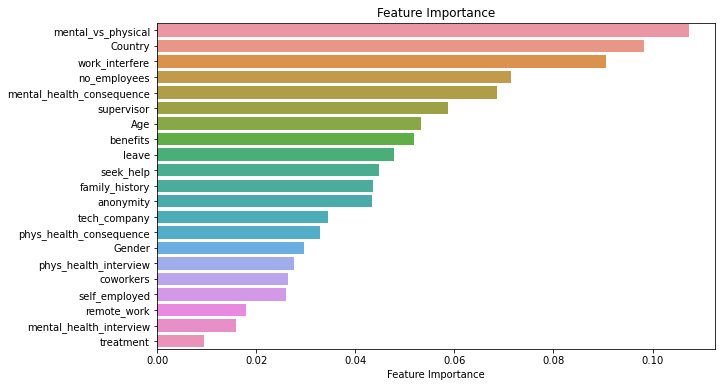

In [176]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

# Random Forest

In [177]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[320   2]
 [ 51   3]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       322
         1.0       0.60      0.06      0.10        54

    accuracy                           0.86       376
   macro avg       0.73      0.52      0.51       376
weighted avg       0.82      0.86      0.81       376


Train_Set
[[748   0]
 [  0 127]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       748
         1.0       1.00      1.00      1.00       127

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [178]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.856021
test_precision    0.350000
test_recall       0.055769
test_f1           0.093571
dtype: float64

## GridSearch

In [179]:
param_grid = {'n_estimators':[50, 100, 300],     #64 ve 128 skorlarina mutlaka bakilmasi gerektigini belirtmistik.
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [180]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [181]:
rf_grid_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

In [182]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[242  80]
 [ 21  33]]
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83       322
         1.0       0.29      0.61      0.40        54

    accuracy                           0.73       376
   macro avg       0.61      0.68      0.61       376
weighted avg       0.83      0.73      0.77       376


Train_Set
[[554 194]
 [ 36  91]]
              precision    recall  f1-score   support

         0.0       0.94      0.74      0.83       748
         1.0       0.32      0.72      0.44       127

    accuracy                           0.74       875
   macro avg       0.63      0.73      0.63       875
weighted avg       0.85      0.74      0.77       875



In [101]:
scores = cross_validate(rf_grid_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


test_accuracy     0.745115
test_precision    0.309494
test_recall       0.589103
test_f1           0.404049
dtype: float64

## Random Forest - Feature Importance

In [183]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
Country                              0.080903
no_employees                         0.075593
work_interfere                       0.073875
leave                                0.073214
mental_vs_physical                   0.067942
mental_health_consequence            0.059621
Age                                  0.057970
phys_health_interview                0.056790
phys_health_consequence              0.053381
seek_help                            0.050553
supervisor                           0.047115
anonymity                            0.043909
benefits                             0.042734
coworkers                            0.036366
Gender                               0.031609
family_history                       0.031601
treatment                            0.027631
tech_company                         0.026464
remote_work                          0.023443
self_employed                        0.021289
mental_health_interview              0.017997

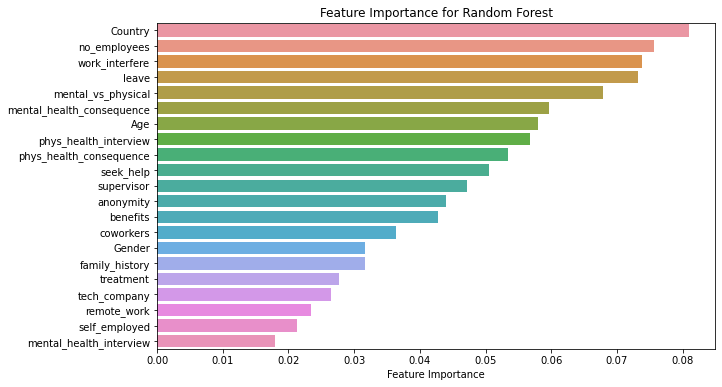

In [184]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.show()

## XGBoost

In [185]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

[20:57:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [186]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[311  11]
 [ 40  14]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.92       322
         1.0       0.56      0.26      0.35        54

    accuracy                           0.86       376
   macro avg       0.72      0.61      0.64       376
weighted avg       0.84      0.86      0.84       376


Train_Set
[[748   0]
 [  0 127]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       748
         1.0       1.00      1.00      1.00       127

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [187]:
scores = cross_validate(xgb, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

[20:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:58:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

test_accuracy     0.845729
test_precision    0.456667
test_recall       0.198718
test_f1           0.268448
test_roc_auc      0.699375
dtype: float64

## Gridsearch for XGBoost

In [188]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[2,3], "learning_rate": [0.1, 0.2], #"scale_pos_weight":[10],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [189]:
xgb_model = XGBClassifier(random_state=42)

In [190]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.58489305, 0.58489305, 0.58489305, 3.44488189, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 3.44488189, 0.58489305, 3.44488189,
       0.58489305, 3.44488189, 0.58489305, 3.44488189, 3.44488189,
       0.58489305, 0.58489305, 3.44488189, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 3.44488189, 3.44488189,
       3.44488189, 0.58489305, 3.44488189, 0.58489305, 0.58489305,
       0.58489305, 0.58489305, 0.58489305, 3.44488189, 0.58489

In [191]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1).fit(X_train, y_train, sample_weight=classes_weights)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[20:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [192]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 2,
 'n_estimators': 50,
 'subsample': 0.5}

In [193]:
xgb_grid.best_score_ 

0.6458461538461538

In [194]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[250  72]
 [ 20  34]]
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.84       322
         1.0       0.32      0.63      0.42        54

    accuracy                           0.76       376
   macro avg       0.62      0.70      0.63       376
weighted avg       0.84      0.76      0.78       376


Train_Set
[[584 164]
 [ 27 100]]
              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       748
         1.0       0.38      0.79      0.51       127

    accuracy                           0.78       875
   macro avg       0.67      0.78      0.69       875
weighted avg       0.87      0.78      0.81       875



## Feature Importance for XGBoost

In [195]:
xgb_model = XGBClassifier(random_state=42, colsample_bytree= 1,
                                             learning_rate= 0.1,
                                             max_depth= 2,
                                             n_estimators= 50,
                                             subsample= 0.5)
xgb_model.fit(X_train, y_train, sample_weight=classes_weights)
feats = pd.DataFrame(index=X.columns, data=xgb_model.feature_importances_, columns=['xgb_importance'])
xgb_feature_imp = feats.sort_values("xgb_importance", ascending=False)
xgb_feature_imp

[21:00:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


xgb_importance
treatment                        0.095331
mental_health_consequence        0.084183
mental_vs_physical               0.068188
work_interfere                   0.059789
leave                            0.055583
coworkers                        0.051570
seek_help                        0.049019
family_history                   0.048933
supervisor                       0.048125
tech_company                     0.042525
self_employed                    0.042271
mental_health_interview          0.042002
benefits                         0.041720
phys_health_consequence          0.039776
Country                          0.037758
Age                              0.036767
anonymity                        0.034818
remote_work                      0.031642
Gender                           0.031589
no_employees                     0.030822
phys_health_interview            0.027592

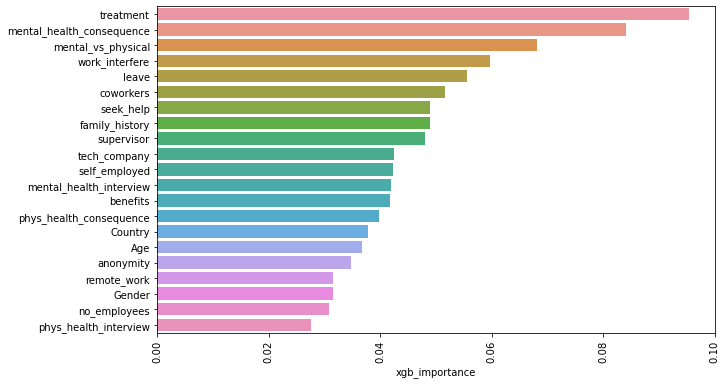

In [196]:
sns.barplot(data=xgb_feature_imp, x='xgb_importance',y=xgb_feature_imp.index)
plt.xticks(rotation=90);

In [ ]:
####

In [197]:
features = ["treatment", "mental_health_consequence", "mental_vs_physical"]

In [198]:
X2 = X[features]

In [199]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [200]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train3)
classes_weights

array([0.58479532, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 3.44827586, 0.58479532, 0.58479532,
       3.44827586, 0.58479532, 0.58479532, 3.44827586, 0.58479532,
       3.44827586, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       3.44827586, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 3.44827586, 0.58479532, 3.44827586,
       0.58479532, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 3.44827586, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 3.44827586, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 3.44827586, 0.58479532, 0.58479532,
       0.58479532, 0.58479532, 0.58479532, 0.58479532, 0.58479532,
       3.44827586, 0.58479532, 0.58479532, 0.58479532, 0.58479

In [201]:
xgb = XGBClassifier(random_state=42).fit(X_train3, y_train3, sample_weight=classes_weights)

[21:00:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [202]:
eval_metric(xgb, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[157  58]
 [ 11  25]]
              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82       215
         1.0       0.30      0.69      0.42        36

    accuracy                           0.73       251
   macro avg       0.62      0.71      0.62       251
weighted avg       0.84      0.73      0.76       251


Train_Set
[[636 219]
 [ 50  95]]
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83       855
         1.0       0.30      0.66      0.41       145

    accuracy                           0.73      1000
   macro avg       0.61      0.70      0.62      1000
weighted avg       0.84      0.73      0.77      1000



In [203]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[2,3], "learning_rate": [0.1, 0.2], #"scale_pos_weight":[10],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [204]:
xgb_model = XGBClassifier(random_state=42)

In [205]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall", verbose=2, n_jobs = -1).fit(X_train3, y_train3, sample_weight=classes_weights)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[21:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [206]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 2,
 'n_estimators': 50,
 'subsample': 0.8}

In [207]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)
eval_metric(xgb_grid, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[143  72]
 [ 10  26]]
              precision    recall  f1-score   support

         0.0       0.93      0.67      0.78       215
         1.0       0.27      0.72      0.39        36

    accuracy                           0.67       251
   macro avg       0.60      0.69      0.58       251
weighted avg       0.84      0.67      0.72       251


Train_Set
[[565 290]
 [ 39 106]]
              precision    recall  f1-score   support

         0.0       0.94      0.66      0.77       855
         1.0       0.27      0.73      0.39       145

    accuracy                           0.67      1000
   macro avg       0.60      0.70      0.58      1000
weighted avg       0.84      0.67      0.72      1000



In [ ]:
#########################

### _THE END_